# **2024 SPWLA PDDA Machine Learning Competition **
### **Automatic Image Log Imputations with Machine Learning**

*   **Original Author: Hyungjoo Lee, October 17, 2024**
*   **Modified by: Vahid Dehdari, January 21, 2025**

- <a>1. Introduction </a>
    - <a>1.1. Background</a>
    - <a>1.2. Problem Statement</a>
    - <a>1.3. Data Description</a>
    - <a>1.4. Evaluation Metric</a>
- <a>2. Import Logs and Fracture Data for Anomaly Detection</a>
- <a>3. Quick Check Image Log Data</a>
- <a>4. Build YOLO Model</a>
- <a>5. Predictions for New Wells T1 and T2</a>
- <a>6. Plotting for Fracture Confirmation</a>
- <a>7. Final Checks</a>
- <a>8. Export</a>
- <a>9. Acknowledgement</a>

<a></a>

## Abstract

**Abstract**

Borehole image logs provide crucial insights into subsurface formations, aiding in the evaluation of geological structures and reservoir properties. This competition challenges participants to develop machine learning models that predict fractures from resistivity image logs, a key tool in geomechanical and petrophysical analysis. Competitors will analyze subsurface resistivity data to accurately identify fracture patterns, which play a crucial role in reservoir characterization and wellbore stability. The provided dataset includes resistivity image logs labeled with fracture annotations, enabling participants to apply advanced machine learning techniques for automated fracture detection. Successful models will improve fracture prediction accuracy, streamline interpretation processes, and enhance decision-making in exploration and production operations.

\
We encorage participants to evaluate various algorithms and methodologies, to determine their effectiveness in identifying fractures from image logs. By leveraging a comprehensive dataset comprising borehole image logs with known fracture segments, participants can train and test different models, comparing their performance based on accuracy, computational efficiency, and robustness. The solutions from different participants will be ranked based on the averaged root-mean-squared-error (RMSE) score measured on the blind-testing data set.
Our findings indicate that advanced machine learning techniques can significantly improve the fidelity of fracture detection from image logs, offering a reliable alternative or supportive to traditional manual process. This research underscores the potential of machine learning to enhance subsurface characterization, thereby optimizing drilling operations and reservoir management.

\
## <a>1. Introduction</a>

### <a>1.1. Background</a>

### Introduction to Borehole Image Logs

Borehole image logs are high-resolution measurements that provide detailed visualizations of the geological formations encountered while drilling. These logs are created by mapping the physical properties of the wellbore wall using various downhole tools, such as resistivity, density, and acoustic sensors. Borehole imaging techniques have become an essential tool in subsurface evaluation, providing crucial insights into rock fabric, structure, and fracture networks.

#### Physics and Measurements
In this competition, we will use borehole image logs that involve with resistivity measurements. These logs measure the electrical resistivity of the formation at the wellbore wall. Conductive muds create electrical contrast between fractures (often more conductive due to fluid-filled spaces) and intact rock. Tools such as the Formation MicroImager (FMI) use electrodes on pads that press against the borehole wall to collect a continuous 360° image of the subsurface. These logs generate high-resolution, 2D or 3D visualizations of the wellbore, providing detailed structural information such as the orientation and density of fractures, bedding planes, and faults.

#### Applications of Borehole Image Logs
Borehole image logs serve a variety of applications across geomechanics, petrophysics, and reservoir characterization as (1) Fracture Analysis: Detecting and characterizing fractures (both natural and induced) is one of the primary uses of image logs. Fractures serve as fluid conduits or barriers, significantly impacting hydrocarbon flow in reservoirs. (2) Structural Interpretation: Image logs allow geologists to identify faults, bedding planes, and deformation patterns, contributing to a better understanding of the stress regime and tectonic history. (3) Wellbore Stability: Borehole images help detect zones of instability, such as breakouts or drilling-induced fractures, which are critical for planning and mitigating drilling risks. and (4) Sedimentary Environment Analysis: Image logs are used to study depositional environments, stratigraphy, and sedimentary structures.

#### Importance of Finding Fractures
Fractures can play a decisive role in subsurface fluid flow and reservoir performance. In fractured reservoirs, hydrocarbons may flow preferentially through these features, making fracture characterization essential for accurate reservoir modeling, well placement, and production forecasting. Understanding the orientation, density, and connectivity of fractures is crucial for both conventional and unconventional reservoirs, especially in tight formations where fracture networks dominate fluid migration pathways.

### <a>1.2. Problem Statement </a>
#### Motivation for Automating Fracture Detection
Traditionally, fracture identification from borehole image logs is done manually by experienced petrophysicists, geologists and geoscientists, a time-consuming and subjective process. Manual picking is prone to human error and variability, making consistent fracture interpretation a challenge, especially in large datasets.

Automating the process of fracture detection using machine learning offers several advantages as (1) Efficiency: Automation drastically reduces the time spent on interpreting vast amounts of borehole image data, allowing for quicker decision-making in time-sensitive operations. (2) Consistency: Machine learning models can apply consistent interpretation rules across the entire dataset, reducing the subjectivity inherent in manual analysis. (3) Scalability: Automated systems can handle large volumes of data from multiple wells, which is often impractical for manual interpretation. and (4) Improved Accuracy: Advanced algorithms can be trained to recognize subtle fracture patterns that may be missed in manual interpretation, leading to more accurate fracture networks.


Therefore, the automation of fracture detection from borehole image logs using machine learning represents a significant advancement in reservoir characterization, reducing the time, subjectivity, and cost associated with traditional manual approaches.

\
Note: Borehole images may exhibit a variety of issues and artifacts due to reasons such as environmental and thermal noise, imperfect calibration, and current leakage through the tool body. But correcting those artifacts is out of scope and will not be discussed in this study.


### <a>1.3. Data Description </a>
We have triple combo+ logs and resistivity image dataset obtained from 10 wells located at Alberta, Canada. These wells are from the same basin and field and are Silisiclastic. Eight wells will be used for training purpose while remaining two will be tested for evaluation.


### <a>1.4. Evaluation Metric </a>
Participants need to detect fractures from two test wells and provide their depth in .csv format. Submissions will be evaluated based on two metrics: the F1 score and root mean squared error (RMSE).

The primary metric is the traditional F1 score (where beta = 1.0), which is the harmonic mean of precision and recall:

- **Precision**: True Positives / (True Positives + False Positives)
- **Recall**   : True Positives / (True Positives + False Negatives)
- **F1 Score** : 2 * (Precision * Recall) / (Precision + Recall)

The F1 score is especially useful when balancing precision and recall is important. For this evaluation, a True Positive is considered within a threshold of ±α meters from the actual fracture depth. An example of the threshold α is as follows: Suppose a fracture is located at 200.0m, with the upper and lower peaks of the sinusoidal curve at 199.4m and 200.6m. A 20% margin (1.2 * 0.2 = 0.24m) is then added to both sides. Thus, if the depth prediction falls within the range of 199.16m to 200.84m, it is considered a true positive (i.e., a correct prediction).






## <a>1. Import Libraries</a>

First, let's download some libraries and import a few common modules.

In [1]:
!pip install lasio
!pip install dlisio
!pip install ultralytics==8.3.52

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 743.8/743.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 23.0 MB/s eta 0:00:00


In [2]:
# import packages for Google Colab
from google.colab import drive
from google.colab import files
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
import random
import os
import glob
import itertools
import tensorflow as tf
import scipy
import cv2
import sys
import shutil
import zipfile

# Load packages for building model
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from contextlib import redirect_stdout
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from matplotlib.patches import Polygon, Rectangle
import warnings
from itertools import product
from sklearn.model_selection import train_test_split
import gc
from ultralytics import YOLO

# Load packages for .las and .dlis files
import lasio
from dlisio import dlis

# Avoid showing some warnings
warnings.filterwarnings("ignore", message=".*Got processor for bboxes.*")
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# to make this notebook's output stable across runs
np.random.seed(100)
tf.random.set_seed(100)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# For connecting data from Google colab
drive.mount('/content/drive')

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


In [3]:
# Python ≥3.7 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is recommended
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"


In [4]:
#print("torch version is ", torch.__version__)
print("pandas version is ", pd.__version__)
print("scipy version is ", scipy.__version__)
print("numpy version is ", np.__version__)
print("lasio version is ", lasio.__version__)


pandas version is  2.2.2
scipy version is  1.13.1
numpy version is  1.26.4
lasio version is  0.31


## <a>2. Import Logs and Fracture Data for Anomaly Detection</a>

In [5]:
# Load Survey logs

# Test wells
well_T1_inc = lasio.read("/content/drive/My Drive/fracture_identification/frac_data/test_data/T1_Inclination.las", engine='normal').df()
well_T2_inc = lasio.read("/content/drive/My Drive/fracture_identification/frac_data/test_data/T2_Inclination.las", engine='normal').df()

well_T1_inc.columns

Index(['AZI', 'CAL2', 'CAL4', 'CAL6', 'CAL8', 'CALX', 'CALY', 'DEV', 'DMAX',
       'DMIN', 'GR', 'HAZI', 'ROT'],
      dtype='object')

In [6]:
well_T1_inc

AZI      CAL2      CAL4      CAL6      CAL8      CALX  \
MD                                                                       
100.4000    3.187066  6.724246  7.435072  7.654347  7.100758  6.847936   
100.5524    4.235824  6.711528  7.224606  7.425181  7.451456  6.841108   
100.7048    5.542619  6.717961  7.118380  7.306600  7.336033  6.842733   
100.8572    7.139249  6.722158  7.098987  7.522357  7.217500  6.834135   
101.0096    8.545360  6.719839  7.083778  7.266276  7.485562  6.811829   
...              ...       ...       ...       ...       ...       ...   
464.3312  171.800400  6.200452  5.998874  6.070827  5.879204  6.218858   
464.4836  170.397200  6.200087  5.999420  6.069643  5.878854  6.219081   
464.6360  169.151500  6.199981  5.999394  6.067727  5.878063  6.218965   
464.7884  167.861700  6.199864  5.996348  6.064462  5.878560  6.218587   
464.9408  166.729400  6.199329  5.995828  6.061179  5.878544  6.218346   

              CALY       DEV      DMAX      DMIN        GR      HAZI  \
MD                                                                     
100.4000  7.220842  1.596960  7.267915  6.847936  171.0578  198.4132   
100.5524  7.207463  1.608461  7.338030  6.841108  174.8077  198.8636   
100.7048  7.217858  1.570533  7.230793  6.842733  176.6528  199.4554   
100.8572  7.225631  1.527920  7.225631  6.834135  173.5703  200.2607   
101.0096  7.209588  1.505102  7.284670  6.811829  167.7702  200.9275   
...            ...       ...       ...       ...       ...       ...   
464.3312  6.180520  1.683259  6.218858  5.939039       NaN  169.4669   
464.4836  6.180384  1.654526  6.219081  5.939137       NaN  169.6555   
464.6360  6.178465  1.595131  6.218965  5.938728       NaN  169.7994   
464.7884  6.177341  1.588354  6.218587  5.937454       NaN  169.9158   
464.9408  6.175245  1.601100  6.218346  5.937186       NaN  170.0661   

                 ROT  
MD                    
100.4000  164.773900  
100.5524  165.372200  
100.7048  166.087300  
100.8572  166.878600  
101.0096  167.617800  
...              ...  
464.3312    2.333493  
464.4836    0.741711  
464.6360  359.352100  
464.7884  357.945900  
464.9408  356.663400  

[2393 rows x 13 columns]

In [7]:
# Load Basic logs

# Test wells
well_T1_log = lasio.read('/content/drive/My Drive/fracture_identification/frac_data/test_data/T1_Logs.las', engine='normal').df()
well_T2_log = lasio.read('/content/drive/My Drive/fracture_identification/frac_data/test_data/T2_Logs.las', engine='normal').df()

well_T1_log.columns

Index(['DT', 'GR', 'ILD', 'NPOR_LIM', 'PEF', 'RHO'], dtype='object')

In [8]:
well_T1_dlis, *tail = dlis.load('/content/drive/My Drive/fracture_identification/frac_data/test_data/Well_T1_Image.dlis')
well_T2_dlis, *tail = dlis.load('/content/drive/My Drive/fracture_identification/frac_data/test_data/Well_T2_Image.dlis')

# Normalization (or scaling) is required (0 to 255 scale)
dlis_wells = [well_T1_dlis, well_T2_dlis]

for well in dlis_wells:
    print("min and max values of the ", str(well), " is ", np.min(well.object('FRAME','IMAGE').curves()['IMVIEW1']), " and ", np.max(well.object('FRAME','IMAGE').curves()['IMVIEW1']))


# Create a dataframe for image data
well_images = {}
list_of_well_images = []

for well in dlis_wells:
  print("well is ", well)
  print("index is ", well.channels[0])
  print("data is ", well.channels[1])
  print("===============================")
  curves = well.object('FRAME','IMAGE').curves()
  well_name = "well_" + str(well)[12:-1]
  well_images[well_name] = pd.DataFrame(curves[str(well.channels[1])[8:-1]], index = curves[str(well.channels[0])[8:-1]]).mul(255.0/np.max(curves[str(well.channels[1])[8:-1]])) # image array data (scale to 0 and 255 to maximize the contrast)
  # well_images[well_name] = pd.DataFrame(curves[str(well.channels[1])[8:-1]], index = curves[str(well.channels[0])[8:-1]]) # image array data

print("Done!")

min and max values of the  LogicalFile(T1)  is  0  and  152
min and max values of the  LogicalFile(T2)  is  0  and  152
well is  LogicalFile(T1)
index is  Channel(INDEX253)
data is  Channel(IMVIEW1)
well is  LogicalFile(T2)
index is  Channel(INDEX2647)
data is  Channel(IMVIEW1)
Done!


In [9]:
frac = pd.read_csv(r"/content/drive/My Drive/fracture_identification/frac_data/Fracture_data.csv")
frac

Index Well        MD    ANGLE   AZIMUTH     Depth  ADIPnew   AAZInew  \
0        0    A  115.9780  72.7027  275.1597  116.0580  42.7760  275.2326   
1        1    A  135.0881  77.6677  353.8462  135.0581  72.7666  353.8209   
2        2    A  139.1479  34.9659   22.2341  139.1479  35.0617   21.9782   
3        3    A  140.8838  40.1933  292.8713  140.8838  40.4759  293.0215   
4        4    A  143.1767  61.0260  329.1889  143.2967  61.2799  329.1402   
..     ...  ...       ...      ...       ...       ...      ...       ...   
110    110    H  411.4756  54.8860  126.8316  411.4556  38.7575  126.4116   
111    111    H  411.4869  50.1351  128.3640  411.5369  29.0065  127.8974   
112    112    H  411.5398  38.2001  121.7808  411.5198  37.1581  120.9156   
113    113    H  411.5839  70.5446  313.1348  411.5839  71.6940  313.2824   
114    114    H  411.7225  73.7028  263.4208  411.7225  74.1216  263.7563   

     DIP_TYPE  
0    Fracture  
1    Fracture  
2    Fracture  
3    Fracture  
4    Fracture  
..        ...  
110  Fracture  
111  Fracture  
112  Fracture  
113  Fracture  
114  Fracture  

[115 rows x 9 columns]

In [10]:
well_T1_log = well_T1_log.reset_index()
well_T1_inc = well_T1_inc.reset_index()
well_T1_log = well_T1_log.rename(columns={'DEPT': 'Depth'})
well_T1_inc  = well_T1_inc.rename(columns={'MD': 'Depth'})

well_T2_log = well_T2_log.reset_index()
well_T2_inc = well_T2_inc.reset_index()
well_T2_log = well_T2_log.rename(columns={'DEPT': 'Depth'})
well_T2_inc  = well_T2_inc.rename(columns={'MD': 'Depth'})

In [11]:
df_T1_merged_frac = pd.merge_asof(
    left=well_T1_inc,
    right=well_T1_log,
    on='Depth',
    direction='nearest'
)



df_T2_merged_frac = pd.merge_asof(
    left=well_T2_inc,
    right=well_T2_log,
    on='Depth',
    direction='nearest'
)

Understanding the Logs for Fracture Detection
1. NPOR_LIM (Limestone Neutron Porosity):

Fractures introduce secondary porosity. If fractures are fluid-filled, neutron porosity can be higher than expected for the given lithology.
Crossover Analysis: When neutron porosity (NPOR_LIM) exceeds density-derived porosity (from RHO), it often indicates fractures or vuggy porosity.
In carbonates, NPOR_LIM is particularly useful because fractures can contribute significantly to fluid storage and transport.
2. RHO (Compensated Density in K/M³):

Fractures typically reduce bulk density. Open fractures or fractures filled with light fluids (oil or gas) will show density drops that are not in line with the surrounding matrix.
Density reductions indicate secondary porosity or potential breakage in the rock fabric.
3. DT (Compressional Slowness in us/m):

Open or partially open fractures slow down compressional waves as they pass through less consolidated zones, increasing DT (higher slowness).
Cycle skipping or erratic DT values may indicate highly fractured or chaotic zones.
Sharp DT spikes correlate with potential fracture zones.
4. ILD (Deep Resistivity in OHMM):

Fractures filled with brine or conductive fluids result in lower resistivity (ILD drop).
Conversely, fractures filled with hydrocarbons or cemented minerals may increase resistivity.
Resistivity anomalies without lithological changes (from GR/PEF) are key fracture indicators.

5. Borehole Geometry and Tool Orientation (Azi and Dev):

Azimuth (Azi) and Deviation (Dev) logs can provide indirect clues. Changes in borehole deviation or azimuth that coincide with other log anomalies might suggest structural or geomechanical changes, possibly related to fracturing.
While these logs don’t show fractures directly, if the well trajectory changes in or near a zone of interest, and if other logs also show unusual responses, it may hint at local fracturing or faulting.

---


$\Delta_{\text{Porosity}} = NPOR_{\text{LIM}} - \phi_{\text{density}}$

Where $\phi_{\text{density}}$ is derived from RHO.

### Density Porosity Formula:

$$
\phi_{\text{density}} = \frac{\rho_{\text{matrix}} - \rho_{\text{bulk}}}{\rho_{\text{matrix}} - \rho_{\text{fluid}}}
$$

Where:
- $\phi_{\text{density}}$ = Density-derived porosity (fraction or %)
- $\rho_{\text{matrix}}$ = Matrix (grain) density (Kg/m³)
- $\rho_{\text{bulk}}$ = Bulk density (from RHO log) (Kg/m³)
- $\rho_{\text{fluid}}$ = Fluid density (Kg/m³)


### Key Inputs:

1. **Matrix Density ($\rho_{\text{matrix}}$):**
   - Limestone: 2.71 g/cm³ or 2710 Kg/m³
   - Sandstone: 2.65 g/cm³ or 2650 Kg/m³
   - Dolomite: 2.87 g/cm³ or 2870 Kg/m³

2. **Fluid Density ($\rho_{\text{fluid}}$):**
   - Fresh Water: 1.0 g/cm³ or 1000 Kg/m³
   - Brine: 1.1 g/cm³ or 1100 Kg/m³
   - Hydrocarbons: 0.7 – 0.9 g/cm³ or 700 – 900 Kg/m³


In [12]:
# Calculate approximate density porosity
df_T1_merged_frac['RHO_POR'] = (2710 - df_T1_merged_frac['RHO'])/(2710 - 800)
df_T2_merged_frac['RHO_POR'] = (2710 - df_T2_merged_frac['RHO'])/(2710 - 800)

# Calculate difference in porosity
df_T1_merged_frac['POR_diff'] = df_T1_merged_frac['NPOR_LIM'] - df_T1_merged_frac['RHO_POR']
df_T2_merged_frac['POR_diff'] = df_T2_merged_frac['NPOR_LIM'] - df_T2_merged_frac['RHO_POR']

In [13]:
# Remove some of columns
df_T1_merged_frac_short = df_T1_merged_frac[['Depth', 'DT', 'ILD', 'POR_diff']]
df_T2_merged_frac_short = df_T2_merged_frac[['Depth', 'DT', 'ILD', 'POR_diff']]

In [14]:
df_T1_merged_frac_short

Depth        DT        ILD  POR_diff
0     100.4000  575.9468   5.574334  0.207629
1     100.5524  576.7410   5.569559  0.213589
2     100.7048  577.6508   5.425475  0.221663
3     100.8572  577.8979   5.603602  0.231438
4     101.0096  575.8361   6.084302  0.228151
...        ...       ...        ...       ...
2388  464.3312       NaN  48.879200       NaN
2389  464.4836       NaN  57.912780       NaN
2390  464.6360       NaN  70.189850       NaN
2391  464.7884       NaN  77.234620       NaN
2392  464.9408       NaN  78.574820       NaN

[2393 rows x 4 columns]

### Anomaly Detection with Autoencoder (Deep Learning Approach)

We use image logs in the next section for finding fractures. Problem is that using image logs we may get many false fracture forecast. To solve this problem, we also use log data to find anomalies (fractures), and we compare YOLO results with anomalies to confirm if we have fracture or not.

A deep autoencoder is a neural network trained to reconstruct “normal” data. Data that cannot be reconstructed well (i.e., with high reconstruction error) is flagged as an anomaly.

---

#### **When to Use**
- You have a substantial dataset and want to leverage deep learning to learn complex, nonlinear relationships among logs.
- You can assume most of your data is “normal,” with relatively few anomalies.

---

#### **Core Idea**
1. Train an autoencoder ($AE$) on your multi-log data, forcing it to learn a compressed representation (the bottleneck) and reconstruct the inputs.
2. Compute the reconstruction error (e.g., Mean Squared Error, MSE) for each depth sample.
3. Samples with high reconstruction error are flagged as potential anomalies.


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8172 - val_loss: 2.5864
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7365 - val_loss: 1.8640
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5889 - val_loss: 1.3450
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4696 - val_loss: 0.9845
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3862 - val_loss: 0.7428
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3220 - val_loss: 0.6349
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2727 - val_loss: 0.5773
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2337 - val_loss: 0.5347
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2015 - val_loss: 0.4964
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1746 - val_loss: 0.4577
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1516 - val_loss: 0.4250
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1320 - val_lo

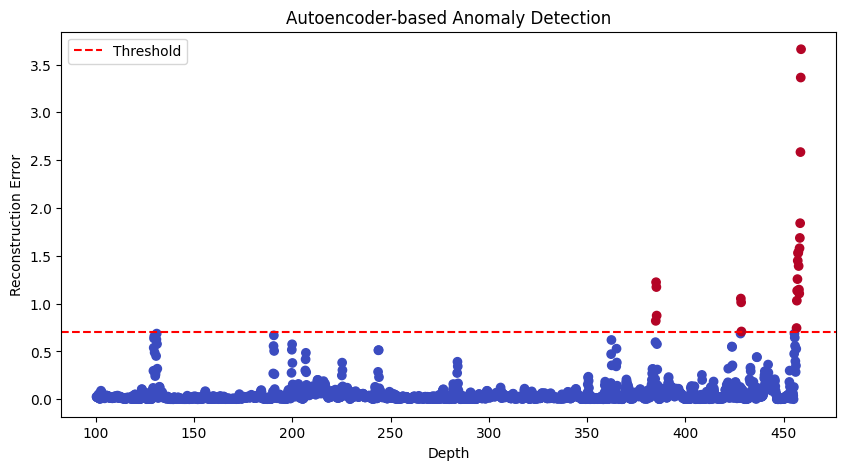

Depth        DT         ILD  POR_diff  Recon_Error  AE_Anomaly
1867  384.9308  485.0896    6.812869 -0.055113     0.819681           1
1868  385.0832  481.9371    7.280967 -0.097004     1.223771           1
1869  385.2356  474.5304    7.224426 -0.099926     1.173286           1
1870  385.3880  461.5193    7.053422 -0.087395     0.874915           1
2151  428.2124  395.5774  208.531700  0.011662     1.053035           1
2152  428.3648  397.4918  207.118800  0.001182     1.013306           1
2153  428.5172  399.9249  194.569800 -0.003308     0.708679           1
2337  456.5588  248.8121   20.261410  0.188835     0.744707           1
2338  456.7112  245.0138   29.151580  0.217288     1.030880           1
2339  456.8636  243.5668   25.272210  0.244096     1.134760           1
2340  457.0160  240.9192   20.972390  0.267300     1.256243           1
2341  457.1684  235.5948   26.110660  0.277358     1.449078           1
2342  457.3208  229.5970   26.407400  0.275598     1.527265           1
2343  457.4732  225.4073   27.143180  0.266418     1.538027           1
2344  457.6256  224.8925   25.748550  0.245683     1.393273           1
2345  457.7780  226.8405   22.264350  0.215196     1.146603           1
2346  457.9304  230.6614   25.007250  0.211459     1.105149           1
2347  458.0828  235.7472   44.579530  0.230803     1.579452           1
2348  458.2352  240.0737   43.687300  0.262680     1.686869           1
2349  458.3876  241.9153   31.711130  0.336171     1.840937           1
2350  458.5400  241.0480   28.863240  0.428573     2.584822           1
2351  458.6924  241.6326   37.923850  0.482553     3.364535           1
2352  458.8448  248.8171   46.274900  0.494932     3.660601           1

In [15]:
SEED = 100
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. Prepare Data
df_test = df_T1_merged_frac_short.copy()
df_test = df_test.dropna()
X = df_test.copy()

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define Autoencoder Model
input_dim = X_scaled.shape[1]

# Simple example architecture
model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='relu'),  # bottleneck
    layers.Dense(10, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # reconstruct original dimension
])

model.compile(optimizer='adam', loss='mse')

# 3. Train Autoencoder (assume mostly normal data)
history = model.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=True
)

# 4. Compute Reconstruction Errors
reconstructions = model.predict(X_scaled)
mse = np.mean((X_scaled - reconstructions)**2, axis=1)

X['Recon_Error'] = mse

# 5. Determine Anomaly Threshold
# For example, pick threshold as mean + 3 stdev, or top percentile
threshold = 0.7   #np.mean(mse) + 3*np.std(mse)
X['AE_Anomaly'] = (X['Recon_Error'] > threshold).astype(int)

# Inspect anomalies
anomalies_T1 = X[X['AE_Anomaly'] == 1]
#print("Autoencoder anomalies:\n", anomalies[['Depth'] + features + ['Recon_Error']])

# 6. Plot Reconstruction Error
plt.figure(figsize=(10,5))
plt.scatter(X['Depth'], X['Recon_Error'],
            c=X['AE_Anomaly'], cmap='coolwarm')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Depth')
plt.ylabel('Reconstruction Error')
plt.title('Autoencoder-based Anomaly Detection')
plt.legend()
plt.show()

anomalies_T1

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8313 - val_loss: 2.5628
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6501 - val_loss: 2.4695
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5244 - val_loss: 2.2801
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4671 - val_loss: 2.0697
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4113 - val_loss: 1.7565
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3085 - val_loss: 1.0840
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1999 - val_loss: 0.6965
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1428 - val_loss: 0.5352
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1141 - val_loss: 0.4138
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0923 - val_loss: 0.3172
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0763 - val_loss: 0.2614
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0671 - val_lo

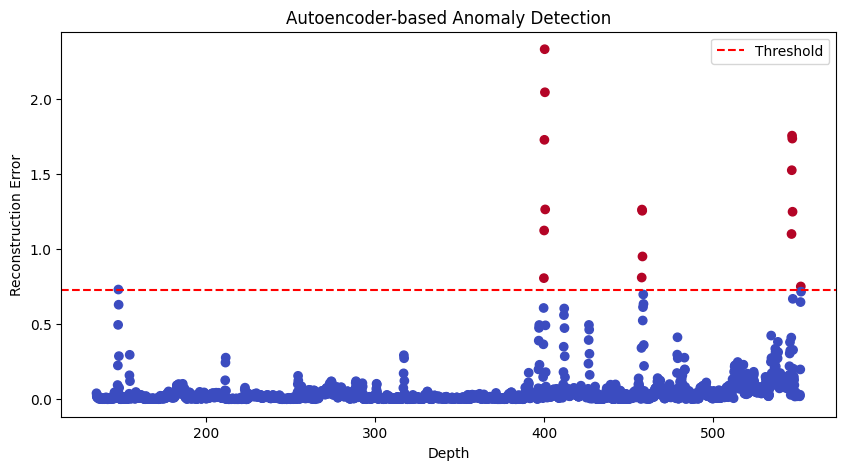

Depth          DT         ILD  POR_diff  Recon_Error  AE_Anomaly
1738  399.8712  210.104787  137.223028  0.091393     0.805873           1
1739  400.0236  192.486130  151.636230  0.061441     1.122962           1
1740  400.1760  191.107777   94.163912  0.006226     1.726273           1
1741  400.3284  201.738935   44.434026 -0.043605     2.329220           1
1742  400.4808  225.904850   36.755436 -0.058557     2.042704           1
1743  400.6332  260.950796   33.231451 -0.041736     1.263100           1
2118  457.7832  315.739102    9.833936  0.261699     0.809846           1
2119  457.9356  299.402061    8.537471  0.288477     1.262160           1
2120  458.0880  287.333691    8.639366  0.271946     1.254053           1
2121  458.2404  268.747797   11.809221  0.209935     0.950080           1
2700  546.4800  347.159337    7.485837  0.322928     1.099550           1
2701  546.6324  335.051419   15.688220  0.346811     1.524021           1
2702  546.7848  328.498249   16.154877  0.358595     1.754069           1
2703  546.9372  326.438972   14.355047  0.354077     1.734546           1
2704  547.0896  324.601833   15.289606  0.314550     1.247676           1
2736  551.9664  287.724583   24.415303  0.228610     0.750441           1

In [16]:
SEED = 3453453
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. Prepare Data
df_test = df_T2_merged_frac_short.copy()
df_test = df_test.dropna()
X = df_test.copy()

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define Autoencoder Model
input_dim = X_scaled.shape[1]

# Simple example architecture
model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(2, activation='relu'),  # bottleneck
    layers.Dense(10, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # reconstruct original dimension
])

model.compile(optimizer='adam', loss='mse')

# 3. Train Autoencoder (assume mostly normal data)
history = model.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=True
)

# 4. Compute Reconstruction Errors
reconstructions = model.predict(X_scaled)
mse = np.mean((X_scaled - reconstructions)**2, axis=1)

X['Recon_Error'] = mse

# 5. Determine Anomaly Threshold
# For example, pick threshold as mean + 3 stdev, or top percentile
threshold = 0.73   #np.mean(mse) + 3*np.std(mse)
X['AE_Anomaly'] = (X['Recon_Error'] > threshold).astype(int)

# Inspect anomalies
anomalies_T2 = X[X['AE_Anomaly'] == 1]
#print("Autoencoder anomalies:\n", anomalies[['Depth'] + features + ['Recon_Error']])

# 6. Plot Reconstruction Error
plt.figure(figsize=(10,5))
plt.scatter(X['Depth'], X['Recon_Error'],
            c=X['AE_Anomaly'], cmap='coolwarm')
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Depth')
plt.ylabel('Reconstruction Error')
plt.title('Autoencoder-based Anomaly Detection')
plt.legend()
plt.show()

anomalies_T2

## <a>3. Quick Check Image Log Data</a>






In [17]:
DATA_DIR = '/content/drive/My Drive/fracture_identification/data/'

In [18]:
# To make this notebook's output stable across runs
np.random.seed(100)
tf.random.set_seed(100)

In [19]:
# Prepare image and label paths
image_paths = glob.glob(os.path.join(DATA_DIR, 'images', '**', '*.jpg'), recursive=True)
label_paths = label_paths = [img_path.replace('/images/', '/labels/').replace('.jpg', '.txt') for img_path in image_paths]


In [20]:
# current path
!pwd
print(os.path.exists(DATA_DIR))
print(os.listdir(DATA_DIR))
print(image_paths)
print(label_paths)

/content
True
['images', 'labels']
['/content/drive/My Drive/fracture_identification/data/images/train/27_fracture_well_A_at_443.1373m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/77_fracture_well_H_at_178.5209m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/41_fracture_well_C_at_342.3m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/90_fracture_well_H_at_259.0229m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/66_fracture_well_G_at_225.29m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/71_fracture_well_G_at_353.55m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/26_fracture_well_A_at_443.1139m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/28_fracture_well_A_at_443.4917m.jpg', '/content/drive/My Drive/fracture_identification/data/images/train/65_fracture_well_F_at_287.902m.jpg', '/content/drive/My Drive/fr

In [21]:
def plot_image_with_polygons(image_path, label_path):
    """
    Reads an image and a corresponding label file, scales the label coordinates to match
    the image dimensions, and overlays the polygons described in the label file on the image.

    Parameters:
        image_path (str): Path to the image file.
        label_path (str): Path to the corresponding label file.
    """
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    # Convert image from BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Get image dimensions
    height, width = image.shape[:2]

    # Read the label file
    polygons = []
    if not os.path.exists(label_path):
        raise ValueError(f"Label file not found at {label_path}")
    with open(label_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) < 3:
                continue  # Skip invalid or empty lines
            # Ignore the first value (polygon index)
            coords = np.array(parts[1:], dtype=float).reshape(-1, 2)
            # Multiply coordinates by image dimensions or 255 to scale to pixel coordinates
            # Adjust this according to how your labels are normalized
            coords[:, 0] *= width  # Scale x-coordinates
            coords[:, 1] *= height  # Scale y-coordinates
            # If labels are normalized between 0 and 255, adjust as follows:
            # coords[:, 0] *= (width / 255)
            # coords[:, 1] *= (height / 255)
            polygons.append(coords)

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('on')  # Show axes
    plt.xlabel('X (pixels)', fontsize=12)
    plt.ylabel('Y (pixels)', fontsize=12)
    plt.title("Image with Polygons", fontsize=16)

    # Overlay polygons
    ax = plt.gca()
    for polygon in polygons:
        polygon_patch = Polygon(polygon, closed=True, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(polygon_patch)

    plt.show()


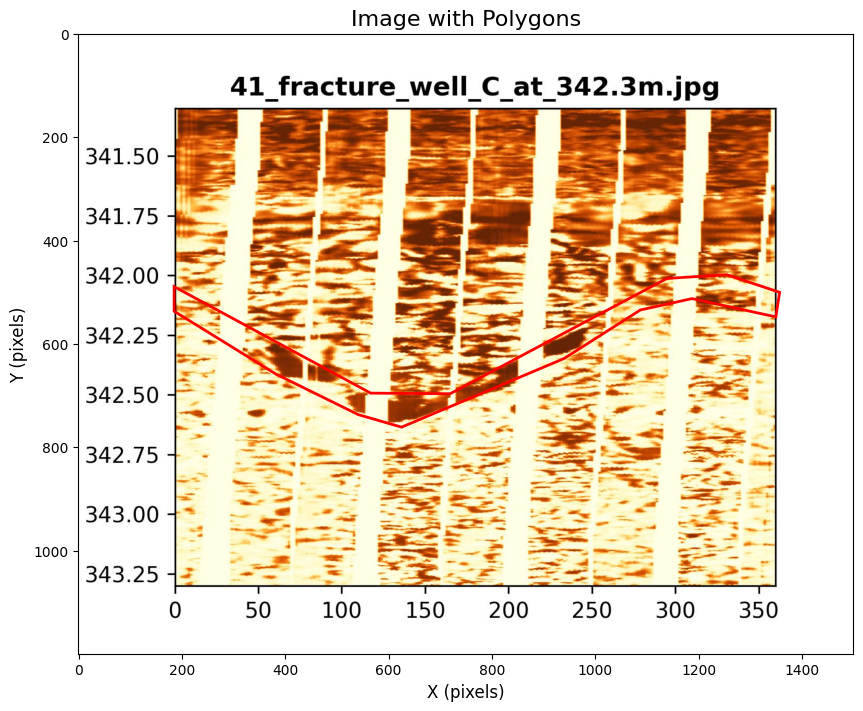

In [ ]:
plot_image_with_polygons(image_paths[2], label_paths[2])

## <a>4. Build YOLO Model</a>

In [ ]:
# Set your data directory here
# Plan is to read data from original directory, shuffle train and validation data and save them in a new directory with train and validation folders
ORIG_DATA_DIR = '/content/drive/My Drive/fracture_identification/data/'
DATA_DIR = '/content/drive/My Drive/fracture_identification/data_new/'

# Create new data directories for shuffled data
os.makedirs(os.path.join(DATA_DIR, 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, 'images', 'val'), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, 'labels', 'val'), exist_ok=True)

# Gather image and label paths from original data
image_paths = glob.glob(os.path.join(ORIG_DATA_DIR, 'images', '**', '*.jpg'), recursive=True)
label_paths = [img_path.replace('/images/', '/labels/').replace('.jpg', '.txt') for img_path in image_paths]

# Split into train/val sets
train_image_paths, val_image_paths, train_label_paths, val_label_paths = train_test_split(
    image_paths, label_paths, test_size=0.2, random_state=69069
)

# Copy shuffled train images and labels to data_new directory
for img_path, lbl_path in zip(train_image_paths, train_label_paths):
    img_name = os.path.basename(img_path)
    lbl_name = img_name.replace('.jpg', '.txt')
    shutil.copy(img_path, os.path.join(DATA_DIR, 'images', 'train', img_name))
    if os.path.exists(lbl_path):
        shutil.copy(lbl_path, os.path.join(DATA_DIR, 'labels', 'train', lbl_name))

# Copy val images and labels to data_new
for img_path, lbl_path in zip(val_image_paths, val_label_paths):
    img_name = os.path.basename(img_path)
    lbl_name = img_name.replace('.jpg', '.txt')
    shutil.copy(img_path, os.path.join(DATA_DIR, 'images', 'val', img_name))
    if os.path.exists(lbl_path):
        shutil.copy(lbl_path, os.path.join(DATA_DIR, 'labels', 'val', lbl_name))

# Create data.yaml for YOLOv8 to the folder
data_yaml_path = os.path.join(DATA_DIR, 'data.yaml')
with open(data_yaml_path, 'w') as f:
    f.write(f"path: {DATA_DIR}\n")
    f.write("train: images/train\n")
    f.write("val: images/val\n")
    f.write("test: images/val\n")  # Assuming no separate test set
    f.write("nc: 1\n")
    f.write("names:\n")
    f.write("  0: fracture\n")


Maximizing the contrast between high and low resistivity points is crucial. Let's attempt to convert the static images into dynamic ones for better visualization.

In [22]:
def static2dynamic(image_data):
    q3 = np.nanquantile(image_data[image_data < 255.0], 0.03)
    q97 = np.nanquantile(image_data[image_data < 255.0], 0.97)
    image_data_dynamic = (255 * (image_data - q3) / (q97 - q3))
    image_data_dynamic[image_data_dynamic < 0] = 0
    image_data_dynamic[image_data_dynamic > 255] = 255
    return image_data_dynamic.astype(np.uint8)

### **Data Augmentation**

### Transformation Pipeline

#### **A.Compose([...])**
Combines multiple image and bounding box transformations into a sequential pipeline.

---

#### **Image Transformations:**

1. **A.RandomCrop(width=512, height=512, p=0.5):**  
   Randomly crops a 512x512 region from the image with a 50% probability.
   
2. **A.HorizontalFlip(p=0.5):**  
   Flips the image horizontally with a 50% probability.
   
3. **A.VerticalFlip(p=0.5):**  
   Flips the image vertically with a 50% probability.
   
4. **A.RandomBrightnessContrast(p=0.2):**  
   Randomly adjusts the brightness and contrast of the image with a 20% probability.
   
5. **A.Normalize():**  
   Normalizes the image by scaling pixel values to a range appropriate for a neural network (e.g., mean and standard deviation adjustments).
   
6. **A.HueSaturationValue(p=0.3):**  
   Randomly adjusts the hue, saturation, and value (HSV color space) with a 30% probability.
   
7. **A.RandomGamma(p=0.3):**  
   Applies random gamma correction to modify brightness and contrast, with a 30% probability.
   
8. **A.GaussianBlur(blur_limit=(3,7), p=0.2):**  
   Applies Gaussian blur with a kernel size between 3 and 7, with a 20% probability.
   
9. **A.Sharpen(alpha=(0.2, 0.5), p=0.2):**  
   Sharpens the image with blending intensity alpha (20-50%) with a 20% probability.
   
10. **A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=0.3):**  
    Randomly shifts, scales, or rotates the image (up to 5% shift, 10% scaling, and 10° rotation) with a 30% probability.
    
11. **ToTensorV2():**  
    Converts the image (and associated data) into a PyTorch tensor format, ready for use in a deep learning model.

---

#### **Bounding Box Transformations:**

1. **A.BboxParams:**
   - `format='pascal_voc':` Indicates that bounding boxes are in the Pascal VOC format ([x_min, y_min, x_max, y_max]).
   - `label_fields=['labels']:` Ensures that transformations applied to bounding boxes also maintain alignment with the corresponding labels.
   - `check_each_transform=False:` Disables checking the validity of bounding boxes after each transformation.
   - `min_visibility=0.001:` Ensures that only bounding boxes with at least 0.1% visibility after transformation are retained.



### Validation Pipeline

The validation pipeline differs from the training pipeline in the following ways:

1. **No Augmentations:**  
   - No augmentations are applied to the validation dataset.  
   - The validation dataset should represent the real-world input distribution without added variability.  
   - This ensures that the validation results reflect the model's actual performance.

2. **Normalization Only:**  
   - Normalization is the only preprocessing step applied.  
   - It ensures that the input image format matches the format expected by the model.

3. **Bounding Box Transformations:**  
   - Bounding box transformations are applied to maintain alignment with the normalized images.  
   - This ensures that object detection tasks remain consistent and reliable.


In [ ]:
def get_train_transform():
    return A.Compose([
        A.RandomCrop(width=512, height=512, p=0.5),  # Randomly crop part of the image
        A.HorizontalFlip(p=0.5),                   # Flip horizontally
        A.VerticalFlip(p=0.5),                     # Flip vertically
        A.RandomBrightnessContrast(p=0.2),         # Adjust brightness and contrast
        A.Normalize(),                             # Normalize for neural networks
        A.HueSaturationValue(p=0.3),    # Color Jittering (Hue, Saturation, Value)
        A.RandomGamma(p=0.3),    # Random Gamma Correction
        A.GaussianBlur(blur_limit=(3,7), p=0.2),   # Blurring
        A.Sharpen(alpha=(0.2, 0.5), p=0.2),   # Sharpening
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=0.3),
        ToTensorV2(),                              # Convert to PyTorch tensor
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['labels'],
        check_each_transform=False,
        min_visibility=0.001
    ))

def get_valid_transform():
    return A.Compose([
        A.Normalize(),                             # Only normalize for validation
        ToTensorV2(),
    ], bbox_params=A.BboxParams(
        format='pascal_voc',
        label_fields=['labels'],
        check_each_transform=False,
        min_visibility=0.001
    ))

### Key Model Components

---

#### **Custom Dataset Class (FractureDataset):**
- **Purpose:** Prepares image-label pairs for object detection tasks.
- **Workflow:**
  1. Reads image paths and corresponding label files.
  2. Loads images using `cv2`.
  3. Applies `static2dynamic` preprocessing to the images.
  4. Reads bounding box annotations from the label files.
  5. Converts normalized coordinates ([0,1]) to absolute pixel values based on image dimensions.
  6. Ensures bounding boxes are valid and filters out invalid ones.
  7. Applies transformations:
     - **Training:** Data augmentation.
     - **Validation:** Normalization.
  8. Outputs processed data:
     - Images.
     - Corresponding bounding boxes, labels, and polygons.

---

#### **Training and Validation Loops:**
- Utilizes `train_loader` and `val_loader` created from the `FractureDataset`.
- Applies Albumentations transformations:
  - `get_train_transform` for training.
  - `get_valid_transform` for validation.

---

#### **Hyperparameter Tuning:**
1. **Grid Search:**
   - Explores combinations of:
     - Epochs (epochs_list = [200, 500]).
     - Batch size (batch_size_list = [8, 16, 32]).
     - Learning rates (learning_rate_list = [0.00001, 0.0001, 0.0002, 0.00009]).
   - Trains the YOLOv8m model for each combination and evaluates its performance.
   - Optimization method: Adam (short for Adaptive Moment Estimation)
   
2. **YOLO Model Selection:**
   - Supports multiple YOLOv8 variants (e.g., `yolov8m-seg`, `yolo11s-seg`).
   - Trades off between accuracy and resource consumption.
   - Evaluates each configuration using `model.val`, which provides metrics like:
     - Precision.
     - Recall.
     - Mean Average Precision (mAP).

---

#### **Performance Evaluation:**
- Calculates key metrics for validation data:
  - **F1 score.**
  - **Precision.**
  - **Recall.**
- Tracks the best-performing model's parameters globally.

---

#### **Model Saving:**
- Saves models based on their performance:
  - Stores model weights (`best.pt`) in dynamically named folders reflecting the metrics.
  - Copies and renames the best model's weights to a descriptive name for easy identification.

---

#### **Resource Management:**
- Releases memory after each training run:
  1. Deletes datasets, data loaders, and models.
  2. Collects garbage.
  3. Clears CUDA cache to avoid memory leaks.


In [ ]:
class FractureDataset(Dataset):
    def __init__(self, image_paths, label_paths, transforms=None):
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = cv2.imread(img_path)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = static2dynamic(img)

        label_path = self.label_paths[idx]
        h, w, _ = img.shape

        boxes = []
        labels = []
        polygons = []  # Store polygon coordinates for GT fracture

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    # Each row starts with 0 then polygon coords
                    if (len(parts)-1) < 2 or ((len(parts)-1) % 2 != 0):
                        continue
                    coords_str = parts[1:]
                    coords = np.array(coords_str, dtype=float).reshape(-1, 2)
                    if coords.size == 0:
                        continue

                    # Convert normalized [0,1] to absolute pixel coords
                    coords[:, 0] *= w
                    coords[:, 1] *= h

                    x_min = np.min(coords[:, 0])
                    y_min = np.min(coords[:, 1])
                    x_max = np.max(coords[:, 0])
                    y_max = np.max(coords[:, 1])

                    # Filter invalid boxes before augmentation
                    if x_min >= x_max or y_min >= y_max:
                        continue

                    boxes.append([x_min, y_min, x_max, y_max])
                    labels.append(1)
                    polygons.append(coords)
        else:
            return None

        if len(boxes) == 0:
            return None

        target = {
            'boxes': boxes,
            'labels': labels,
            'polygons': polygons
        }

        try:
            transformed = self.transforms(image=img, bboxes=target['boxes'], labels=target['labels'])
        except ValueError:
            return None

        img = transformed['image']
        new_boxes = transformed['bboxes']
        new_labels = transformed['labels']

        valid_boxes = []
        valid_labels = []
        final_polygons = polygons  # no transform for polygons

        for b, l in zip(new_boxes, new_labels):
            if len(b) == 4:
                x_min, y_min, x_max, y_max = b
                if x_min < x_max and y_min < y_max:
                    valid_boxes.append(b)
                    valid_labels.append(l)

        if len(valid_boxes) == 0:
            return None

        final_boxes = torch.as_tensor(valid_boxes, dtype=torch.float32)
        final_labels = torch.as_tensor(valid_labels, dtype=torch.int64)

        target['boxes'] = final_boxes
        target['labels'] = final_labels
        target['polygons'] = final_polygons

        return img, target

def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    if len(batch) == 0:
        return None, None
    return tuple(zip(*batch))


def iou(boxA, boxB):
    # box format: [x_min, y_min, x_max, y_max]
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interW = max(0, xB - xA)
    interH = max(0, yB - yA)
    interArea = interW * interH
    boxAArea = (boxA[2]-boxA[0]) * (boxA[3]-boxA[1])
    boxBArea = (boxB[2]-boxB[0]) * (boxB[3]-boxB[1])
    union = boxAArea + boxBArea - interArea
    return interArea / float(union) if union > 0 else 0


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


best_f1 = 0.0
best_precision = 0.0
best_recall = 0.0
best_params = None


epochs_list = [200, 500]
batch_size_list = [8, 16, 32]
learning_rate_list = [0.00001, 0.0001, 0.0002, 0.00009]

for EPOCHS, BATCH_SIZE, LEARNING_RATE in product(epochs_list, batch_size_list, learning_rate_list):
    print(f"\nTesting: EPOCHS={EPOCHS}, BATCH_SIZE={BATCH_SIZE}, LR={LEARNING_RATE}")

    train_dataset = FractureDataset(
        glob.glob(os.path.join(DATA_DIR, 'images', 'train', '*.jpg')),
        [p.replace('/images/train/', '/labels/train/').replace('.jpg', '.txt')
         for p in glob.glob(os.path.join(DATA_DIR, 'images', 'train', '*.jpg'))],
        transforms=get_train_transform()
    )

    val_dataset = FractureDataset(
        glob.glob(os.path.join(DATA_DIR, 'images', 'val', '*.jpg')),
        [p.replace('/images/val/', '/labels/val/').replace('.jpg', '.txt')
         for p in glob.glob(os.path.join(DATA_DIR, 'images', 'val', '*.jpg'))],
        transforms=get_valid_transform()
    )

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0, collate_fn=collate_fn)

    model = YOLO('yolov8m-seg.pt')   # Medium model, more accurate but requires more resources (20.1M parame)
    #model = YOLO('yolo11s-seg.pt')  # Small model, a good balance of speed and accuracy (9.4M parame)
    #model = YOLO('yolo11m-seg.pt')  # Medium model, more accurate but requires more resources (20.1M parame)
    #model = YOLO('yolo11l-seg.pt')  # Large model, even more accurate, but slower and more resource-intensive (25.3M parame)
    #model = YOLO('yolo11x-seg.pt')  # Extra large model, highest accuracy, but slowest and heaviest on GPU memory (56.9M parame)


    data_yaml_path = os.path.join(DATA_DIR, 'data.yaml')

    initial_name = f'yolo_E{EPOCHS}_B{BATCH_SIZE}_L{LEARNING_RATE}'

    # Write confidence results to a text file in the initial folder
    initial_folder = os.path.join('/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj', initial_name)


    model.train(
        data=data_yaml_path,
        epochs=EPOCHS,
        imgsz=512,
        batch=BATCH_SIZE,
        lr0=LEARNING_RATE,  #
        optimizer='Adam',
        patience=500,
        amp=True,
        device=0 if torch.cuda.is_available() else 'cpu',
        project='/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj',
        name=initial_name,
        verbose=False,
        #freeze=22
    )

    # After training, test confidence thresholds from 0.0 to 1.0 (step 0.01)
    local_best_f1 = 0.0
    local_best_precision = 0.0
    local_best_recall = 0.0
    local_best_conf = 0.0

    # Validate the model on your test dataset
    metrics_val = model.val(data=data_yaml_path)
    mp_val, mr_val, map50_val, map_val = metrics_val.box.mean_results()
    F1_val = 2 * (mp_val * mr_val) / (mp_val + mr_val)

    print("==========================================================")
    print("Validation results are ===================================")
    print("Mean precision is ", mp_val)
    print("Mean recall is ", mr_val)
    print("Mean AP at IoU threshold of 0.5 is ", map50_val)
    print("Mean AP at IoU thresholds from 0.5 to 0.95 is ", map_val)
    print("Mean F1 score is ", F1_val)
    print("==========================================================")

    local_best_precision = mp_val
    local_best_recall = mr_val
    local_best_f1 = F1_val


    print(f"Best for E={EPOCHS}, B={BATCH_SIZE}, L={LEARNING_RATE} found: "
          f"F1={local_best_f1:.4f}, P={local_best_precision:.4f}, R={local_best_recall:.4f}")


    # Rename the folder and save model for this run based on local best metrics
    rp = round(local_best_precision*100)
    rr = round(local_best_recall*100)
    rf = round(local_best_f1*100)

    new_name = f"yolo_F{rf}_P{rp}_R{rr}_E{EPOCHS}_B{BATCH_SIZE}_L{LEARNING_RATE}"
    new_folder = os.path.join('/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj', new_name)

    if os.path.exists(initial_folder):
        os.rename(initial_folder, new_folder)

    # YOLO saves best weights at <project>/<name>/weights/best.pt
    src_best_model_path = os.path.join(new_folder, 'weights', 'best.pt')
    model_filename = f"best_model_F{rf}_P{rp}_R{rr}_E{EPOCHS}_B{BATCH_SIZE}_L{LEARNING_RATE}.pt"
    best_model_path = os.path.join(new_folder, 'weights', model_filename)

    if os.path.exists(src_best_model_path):
        shutil.copy(src_best_model_path, best_model_path)
        print(f"Run model saved: {best_model_path}")

    # Check if this local best is better than global best and update if so
    if local_best_f1 > best_f1:
        best_f1 = local_best_f1
        best_precision = local_best_precision
        best_recall = local_best_recall
        best_params = {
            'EPOCHS': EPOCHS,
            'BATCH_SIZE': BATCH_SIZE,
            'LEARNING_RATE': LEARNING_RATE,
        }
        print(f"Updated global best model parameters: F1={best_f1:.4f}, P={best_precision:.4f}, R={best_recall:.4f}")

    last_name = f'yolo_E{EPOCHS}_B{BATCH_SIZE}_L{LEARNING_RATE}2'

    # Write confidence results to a text file in the initial folder
    last_folder = os.path.join('/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj', last_name)

    if os.path.exists(last_folder):
        shutil.rmtree(last_folder)

    del model
    del train_loader
    del val_loader
    del train_dataset
    del val_dataset
    gc.collect()
    torch.cuda.empty_cache()

print("Hyperparameter Tuning Completed.")
print("Best F1 Score:", best_f1)
print("Best Params:", best_params)



Output hidden; open in https://colab.research.google.com to view.

### **Best Model Performance**

**Best model with: Epoch = 200, Batch size = 16, and Learning Rate = 0.00009**

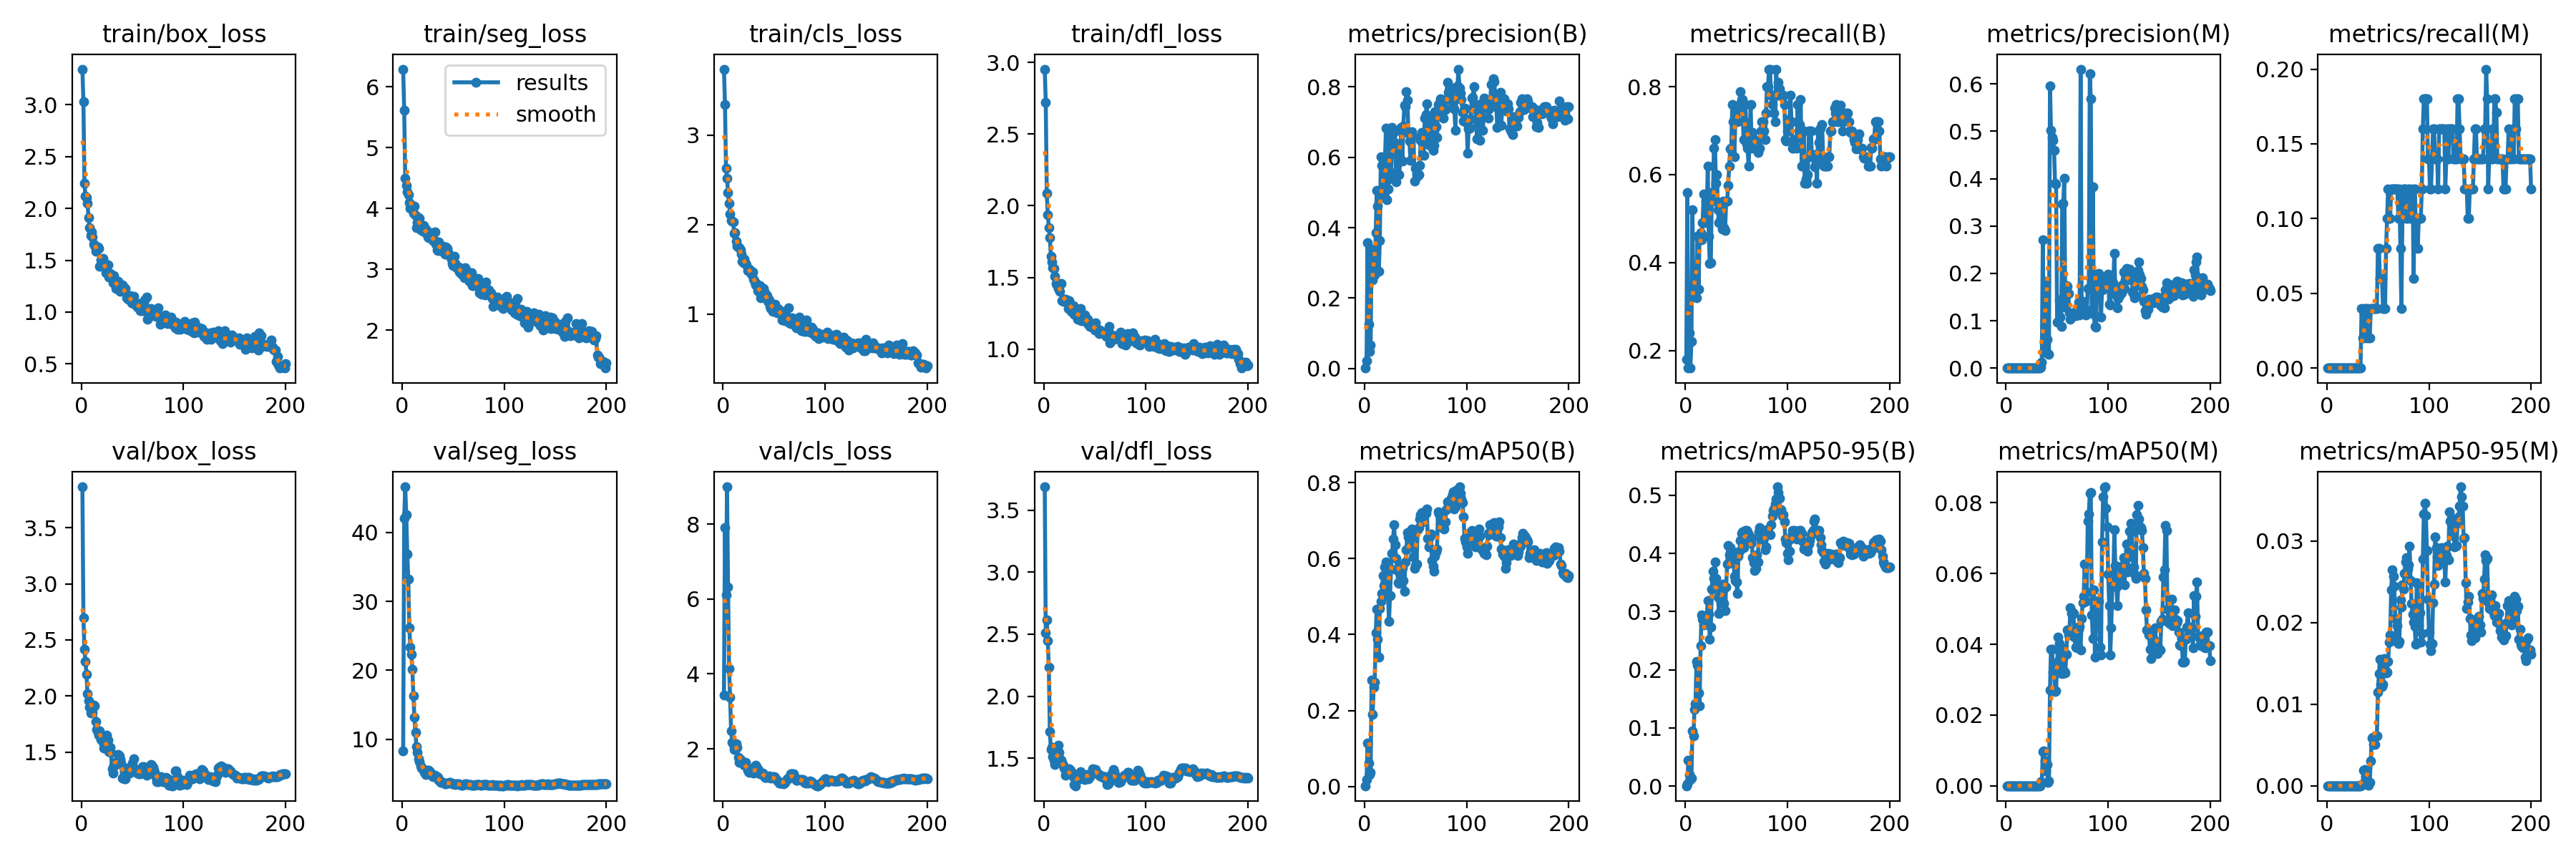

<Figure size 1000x500 with 0 Axes>

In [23]:
# Read images
train_results = cv2.imread("/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj/yolo_F78_P78_R78_E200_B16_L9e-05/results.png")
train_results

plt.figure(figsize=(10, 5))
cv2_imshow(train_results)

The figures below compare the validation fracture labels with the corresponding predictions and their confidence levels. Some fractures are accurately predicted, while others have low-confidence predictions and are not correctly identified.

In [24]:
# Read images
val_labels = cv2.imread('/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj/yolo_F78_P78_R78_E200_B16_L9e-05/val_batch0_labels.jpg')
val_predictions = cv2.imread('/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj/yolo_F78_P78_R78_E200_B16_L9e-05/val_batch0_pred.jpg')

plt.figure(figsize=(30, 25))
plt.subplot(211)
plt.imshow(cv2.cvtColor(val_labels, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("val_labels")
plt.subplot(212)
plt.imshow(cv2.cvtColor(val_predictions, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("val_predictions")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [25]:
# Load the best YOLO model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
best_model_path = '/content/drive/My Drive/fracture_identification/Best_Models_8m_newobj/yolo_F78_P78_R78_E200_B16_L9e-05/weights/best.pt'
model = YOLO(best_model_path)
model.to(device)
model_path = best_model_path
conf_threshold = 0.35  # confidence threshold for finding fractures

In [26]:
# Validate the model on your test dataset
metrics_val = model.val(data="/content/drive/My Drive/fracture_identification/data_new/data.yaml")
mp_val, mr_val, map50_val, map_val = metrics_val.box.mean_results()
F1_val = 2 * (mp_val * mr_val) / (mp_val + mr_val)

print("==========================================================")
print("Validation results are ===================================")
print("Mean precision is ", mp_val)
print("Mean recall is ", mr_val)
print("Mean AP at IoU threshold of 0.5 is ", map50_val)
print("Mean AP at IoU thresholds from 0.5 to 0.95 is ", map_val)
print("Mean F1 score is ", F1_val)
print("==========================================================")

YOLOv8m-seg summary (fused): 245 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 19.5MB/s]
val: Scanning /content/drive/My Drive/fracture_identification/data_new/labels/val.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:58<00:00, 29.44s/it]


                   all         23         50      0.776       0.78      0.781      0.514      0.196        0.1     0.0519     0.0195
Speed: 7.9ms preprocess, 1519.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/segment/val
Validation results are ===================================
Mean precision is  0.7764098799796804
Mean recall is  0.78
Mean AP at IoU threshold of 0.5 is  0.7809967615550738
Mean AP at IoU thresholds from 0.5 to 0.95 is  0.514179336174742
Mean F1 score is  0.778200799383331


## <a>5. Predictions for New Wells T1 and T2</a>
### **Predict depths of potential fractures using images from two test wells (T1 and T2)**

In [27]:
# Calculate number of images for test wells using 2 m interval and 1 m overlap
print("Image log depth interval of T1 well is", well_images["well_T1"].index[-1] - well_images["well_T1"].index[0], "m")
print("Image log depth interval of T2 well is", well_images["well_T2"].index[-1] - well_images["well_T2"].index[0], "m")

T1_well_image_number = int(np.floor(well_images["well_T1"].shape[0]/500))
T2_well_image_number = int(np.floor(well_images["well_T2"].shape[0]/500))

print("Total", T1_well_image_number, "images need to be captured from Well_T1")
print("Total", T2_well_image_number, "images need to be captured from Well_T2")
# ignore last half meter of image

Image log depth interval of T1 well is 364.592 m
Image log depth interval of T2 well is 423.496 m
Total 364 images need to be captured from Well_T1
Total 423 images need to be captured from Well_T2


In [28]:
# Create jpg files from T1 test wells (2 m intervals, 1 m overlap)

for i in range(T1_well_image_number):

    md = well_images["well_T1"].index[0] + i + 1.0 # depth is at the center of the image
    title = str(i) + "_test_well_T1" + "_at_" + str(md) + "m.jpg"

    top_depth = md - 1.0
    bot_depth = md + 1.0
    well_name = "well_T1"
    print(title)

    idx_top = i*500
    idx_bot = idx_top + 1000
    image_data = well_images[well_name].iloc[idx_top:idx_bot]

    # Convert static to dynamic image in order to maximize contrast between black and white
    image_data_dynamic = static2dynamic(image_data)

    #plt.figure(figsize=(5,4))
    #plt.imshow(image_data_dynamic, extent=[0, 360, bot_depth, top_depth], cmap='YlOrBr_r', aspect='auto')
    #plt.title(title, weight="bold")
    #plt.ylabel("Depth [m]", weight="bold")
    #plt.axis([0, 360, bot_depth, top_depth])
    #plt.savefig('/content/drive/My Drive/fracture_identification/frac_data/test_images/T1/' + title, dpi=300)
    #plt.show()
    #plt.close()

0_test_well_T1_at_101.4m.jpg
1_test_well_T1_at_102.4m.jpg
2_test_well_T1_at_103.4m.jpg
3_test_well_T1_at_104.4m.jpg
4_test_well_T1_at_105.4m.jpg
5_test_well_T1_at_106.4m.jpg
6_test_well_T1_at_107.4m.jpg
7_test_well_T1_at_108.4m.jpg
8_test_well_T1_at_109.4m.jpg
9_test_well_T1_at_110.4m.jpg
10_test_well_T1_at_111.4m.jpg
11_test_well_T1_at_112.4m.jpg
12_test_well_T1_at_113.4m.jpg
13_test_well_T1_at_114.4m.jpg
14_test_well_T1_at_115.4m.jpg
15_test_well_T1_at_116.4m.jpg
16_test_well_T1_at_117.4m.jpg
17_test_well_T1_at_118.4m.jpg
18_test_well_T1_at_119.4m.jpg
19_test_well_T1_at_120.4m.jpg
20_test_well_T1_at_121.4m.jpg
21_test_well_T1_at_122.4m.jpg
22_test_well_T1_at_123.4m.jpg
23_test_well_T1_at_124.4m.jpg
24_test_well_T1_at_125.4m.jpg
25_test_well_T1_at_126.4m.jpg
26_test_well_T1_at_127.4m.jpg
27_test_well_T1_at_128.4m.jpg
28_test_well_T1_at_129.4m.jpg
29_test_well_T1_at_130.4m.jpg
30_test_well_T1_at_131.4m.jpg
31_test_well_T1_at_132.4m.jpg
32_test_well_T1_at_133.4m.jpg
33_test_well_T1_at_1

In [30]:
# Predict fractures from T1 well images
folder_path = '/content/drive/My Drive/fracture_identification/frac_data/test_images/T1'

#conf_threshold = 0.35 # Users can adjust this confidence threshold number to identify more or less number of fractures
list_of_frac_depth_T1 = []
list_of_confidence_T1 = []
list_of_masksize_T1 = []  # NEW: to store mask areas

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        depth = float(filename[-10:-5])  # e.g., parse from filename

        # Read image and convert to dynamic range
        img_bgr = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_rgb_dynamic = static2dynamic(img_rgb)
        img_bgr_dynamic = cv2.cvtColor(img_rgb_dynamic, cv2.COLOR_RGB2BGR)
        #img_bgr_dynamic = cv2.imread(img_path)

        title = filename[:-4] + "_prediction"

        # Run inference with YOLO (seg model)
        results = model.predict(
            img_bgr_dynamic,
            save=True,
            save_txt=True,
            conf=conf_threshold,
            project="/content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T1/",
            name=title
        )

        print("Predicting ", title)
        for r in results:
            boxes = r.boxes  # bounding boxes
            # If segmentation masks exist, r.masks.data is a list of mask tensors
            if r.masks is not None:
                mask_data = r.masks.data  # shape [num_dets, H, W] or something similar
            else:
                mask_data = None

            # Iterate over each detection
            for i, box in enumerate(boxes):
                x1, y1, x2, y2 = box.xyxy[0]
                conf = float(box.conf[0])

                # Only keep if above confidence threshold
                if conf > conf_threshold:
                    # Compute fracture depth from bounding box corners
                    frac_depth = (
                        depth
                        + (2.0 / 922.0) * float((y1 + y2) / 2.0)
                        - 1.3102
                    )

                    list_of_frac_depth_T1.append(frac_depth)
                    list_of_confidence_T1.append(conf)

                    # Compute mask size (area) if masks are available
                    if mask_data is not None and i < len(mask_data):
                        # mask_data[i] is a 2D tensor for the i-th detection
                        # Sum all "on" pixels
                        area_px = mask_data[i].sum().item()
                        list_of_masksize_T1.append(area_px)
                    else:
                        # If no masks, or index mismatch
                        list_of_masksize_T1.append(0)  # or None if you prefer

# After this loop, you have parallel lists:
# list_of_frac_depth_T1, list_of_confidence_T1, list_of_masksize_T1
# Each index corresponds to one predicted fracture.



0: 416x512 1 fracture, 929.7ms
Speed: 4.8ms preprocess, 929.7ms inference, 3.8ms postprocess per image at shape (1, 3, 416, 512)
Results saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T1/59_test_well_T1_at_160.4m_prediction3
1 label saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T1/59_test_well_T1_at_160.4m_prediction3/labels
Predicting  59_test_well_T1_at_160.4m_prediction

0: 416x512 (no detections), 920.0ms
Speed: 2.6ms preprocess, 920.0ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 512)
Results saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T1/60_test_well_T1_at_161.4m_prediction3
0 label saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T1/60_test_well_T1_at_161.4m_prediction3/labels
Predicting  60_test_well_T1_at_161.4m_prediction

0: 416x512 1 fracture, 927.1ms
Speed: 4.2ms preprocess

In [31]:
# Create jpg files from T2 test wells (2 m intervals, 1 m overlap)

for i in range(T2_well_image_number):

    md = well_images["well_T2"].index[0] + i + 1.0 # depth is at the center of the image
    title = str(i) + "_test_well_T2" + "_at_" + str(md) + "m.jpg"

    top_depth = md - 1.0
    bot_depth = md + 1.0
    well_name = "well_T2"
    print(title)

    idx_top = i*500
    idx_bot = idx_top + 1000
    image_data = well_images[well_name].iloc[idx_top:idx_bot]

    # Convert static to dynamic image in order to maximize contrast between black and white
    image_data_dynamic = static2dynamic(image_data)

    #plt.figure(figsize=(5,4))
    #plt.imshow(image_data_dynamic, extent=[0, 360, bot_depth, top_depth], cmap='YlOrBr_r', aspect='auto')
    #plt.title(title, weight="bold")
    #plt.ylabel("Depth [m]", weight="bold")
    #plt.axis([0, 360, bot_depth, top_depth])
    #plt.savefig('/content/drive/My Drive/fracture_identification/frac_data/test_images/T2/' + title, dpi=300)
    #plt.show()
    #plt.close()

0_test_well_T2_at_136.0m.jpg
1_test_well_T2_at_137.0m.jpg
2_test_well_T2_at_138.0m.jpg
3_test_well_T2_at_139.0m.jpg
4_test_well_T2_at_140.0m.jpg
5_test_well_T2_at_141.0m.jpg
6_test_well_T2_at_142.0m.jpg
7_test_well_T2_at_143.0m.jpg
8_test_well_T2_at_144.0m.jpg
9_test_well_T2_at_145.0m.jpg
10_test_well_T2_at_146.0m.jpg
11_test_well_T2_at_147.0m.jpg
12_test_well_T2_at_148.0m.jpg
13_test_well_T2_at_149.0m.jpg
14_test_well_T2_at_150.0m.jpg
15_test_well_T2_at_151.0m.jpg
16_test_well_T2_at_152.0m.jpg
17_test_well_T2_at_153.0m.jpg
18_test_well_T2_at_154.0m.jpg
19_test_well_T2_at_155.0m.jpg
20_test_well_T2_at_156.0m.jpg
21_test_well_T2_at_157.0m.jpg
22_test_well_T2_at_158.0m.jpg
23_test_well_T2_at_159.0m.jpg
24_test_well_T2_at_160.0m.jpg
25_test_well_T2_at_161.0m.jpg
26_test_well_T2_at_162.0m.jpg
27_test_well_T2_at_163.0m.jpg
28_test_well_T2_at_164.0m.jpg
29_test_well_T2_at_165.0m.jpg
30_test_well_T2_at_166.0m.jpg
31_test_well_T2_at_167.0m.jpg
32_test_well_T2_at_168.0m.jpg
33_test_well_T2_at_1

In [32]:
# Predict fractures from T2 well images
folder_path = '/content/drive/My Drive/fracture_identification/frac_data/test_images/T2'

list_of_frac_depth_T2 = []
list_of_confidence_T2 = []
list_of_masksize_T2 = []  # NEW: to store mask areas

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        img_path = os.path.join(folder_path, filename)
        depth = float(filename[-10:-5])  # e.g., parse from filename

        # Read image and convert to dynamic range
        img_bgr = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_rgb_dynamic = static2dynamic(img_rgb)
        img_bgr_dynamic = cv2.cvtColor(img_rgb_dynamic, cv2.COLOR_RGB2BGR)
        #img_bgr_dynamic = cv2.imread(img_path)

        title = filename[:-4] + "_prediction"

        # Run inference with YOLO (seg model)
        results = model.predict(
            img_bgr_dynamic,
            save=True,
            save_txt=True,
            conf=conf_threshold,
            project="/content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T2/",
            name=title
        )

        print("Predicting ", title)
        for r in results:
            boxes = r.boxes  # bounding boxes
            # If segmentation masks exist, r.masks.data is a list of mask tensors
            if r.masks is not None:
                mask_data = r.masks.data  # shape [num_dets, H, W] or something similar
            else:
                mask_data = None

            # Iterate over each detection
            for i, box in enumerate(boxes):
                x1, y1, x2, y2 = box.xyxy[0]
                conf = float(box.conf[0])

                # Only keep if above confidence threshold
                if conf > conf_threshold:
                    # Compute fracture depth from bounding box corners
                    frac_depth = (
                        depth
                        + (2.0 / 922.0) * float((y1 + y2) / 2.0)
                        - 1.3102
                    )

                    list_of_frac_depth_T2.append(frac_depth)
                    list_of_confidence_T2.append(conf)

                    # Compute mask size (area) if masks are available
                    if mask_data is not None and i < len(mask_data):
                        # mask_data[i] is a 2D tensor for the i-th detection
                        # Sum all "on" pixels
                        area_px = mask_data[i].sum().item()
                        list_of_masksize_T2.append(area_px)
                    else:
                        # If no masks, or index mismatch
                        list_of_masksize_T2.append(0)  # or None if you prefer

# After this loop, you have parallel lists:
# list_of_frac_depth_T2, list_of_confidence_T2, list_of_masksize_T2
# Each index corresponds to one predicted fracture.


0: 416x512 (no detections), 933.3ms
Speed: 2.9ms preprocess, 933.3ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 512)
Results saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T2/111_test_well_T2_at_247.0m_prediction
0 label saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T2/111_test_well_T2_at_247.0m_prediction/labels
Predicting  111_test_well_T2_at_247.0m_prediction

0: 416x512 (no detections), 922.8ms
Speed: 2.7ms preprocess, 922.8ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 512)
Results saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T2/110_test_well_T2_at_246.0m_prediction
0 label saved to /content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T2/110_test_well_T2_at_246.0m_prediction/labels
Predicting  110_test_well_T2_at_246.0m_prediction

0: 416x512 (no detections), 943.5ms
Speed: 2.6m

It seems the predicted fracture depth is close enough to the real fracture depth.

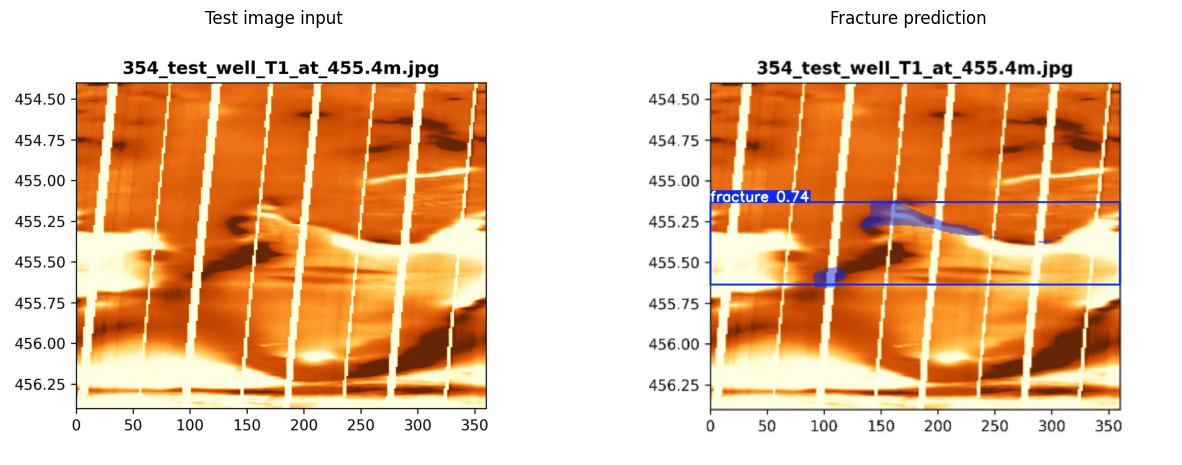

In [33]:
# Let's see one of the predictions from test well T1

test_image1 = cv2.imread('/content/drive/My Drive/fracture_identification/frac_data/test_images/T1/354_test_well_T1_at_455.4m.jpg') # , cv2.IMREAD_GRAYSCALE
test_pred1 = cv2.imread('/content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T1/354_test_well_T1_at_455.4m_prediction/image0.jpg')
test_image1 = cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB)
test_pred1 = cv2.cvtColor(test_pred1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(test_image1)
plt.title("Test image input")
plt.axis("off")
plt.subplot(122)
plt.imshow(test_pred1)
plt.title("Fracture prediction")
plt.axis("off")
plt.show()

YOLO model predicted a fracture with 0.74 confidence, but mask size is small. This tells me we should set threshold for both confidence and mask size to filter some of false positive fractures.

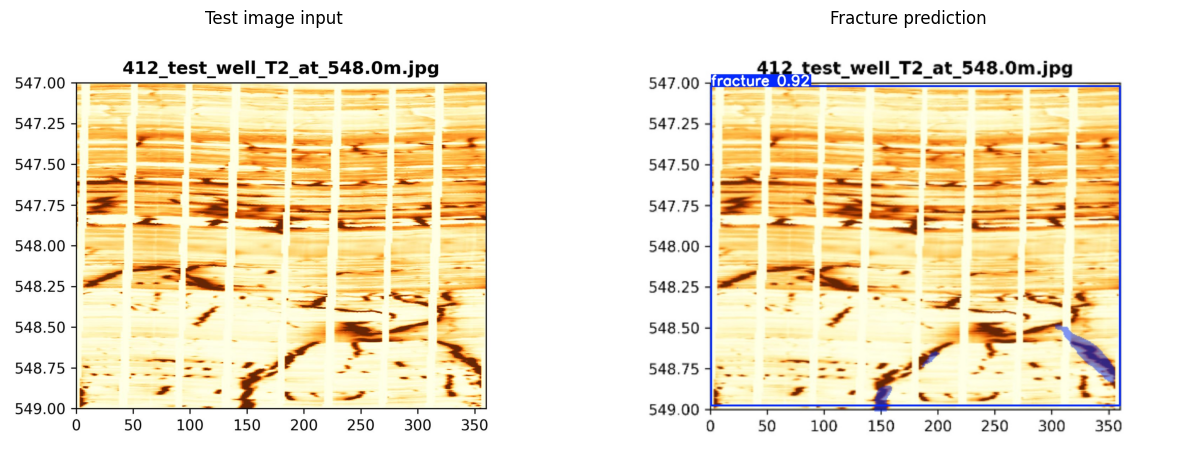

In [34]:
# Let's see one of the predictions from test well T2

test_image1 = cv2.imread('/content/drive/My Drive/fracture_identification/frac_data/test_images/T2/412_test_well_T2_at_548.0m.jpg') # , cv2.IMREAD_GRAYSCALE
test_pred1 = cv2.imread('/content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T2/412_test_well_T2_at_548.0m_prediction/image0.jpg')
test_image1 = cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB)
test_pred1 = cv2.cvtColor(test_pred1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(test_image1)
plt.title("Test image input")
plt.axis("off")
plt.subplot(122)
plt.imshow(test_pred1)
plt.title("Fracture prediction")
plt.axis("off")
plt.show()


YOLO model predicted a fracture with 0.92 confidence, but the box is very large and mask location is on the bottom. This tells me we might need to adjust fracture depth manually.

Let's sort the detected fractures by confidence level and mask size to filter some of false positive identified fractures.

In [35]:
# Set limit for mask size and also confidence for each well
T1_mask_limit = 5000
T1_conf = 0.5

T2_mask_limit = 1000
T2_conf = 0.5

# Sort detected fractures using confidence level
list_of_confidence_T1_sort, list_of_frac_depth_T1_sort, list_of_masksize_T1_sort = zip(*sorted(zip(list_of_confidence_T1, list_of_frac_depth_T1, list_of_masksize_T1), reverse=True))
list_of_confidence_T2_sort, list_of_frac_depth_T2_sort, list_of_masksize_T2_sort = zip(*sorted(zip(list_of_confidence_T2, list_of_frac_depth_T2, list_of_masksize_T2), reverse=True))

# Filter the sorted lists based on the condition
filtered_confidence_T1 = []
filtered_frac_depth_T1 = []
filtered_masksize_T1 = []

for conf, depth, mask in zip(list_of_confidence_T1_sort, list_of_frac_depth_T1_sort, list_of_masksize_T1_sort):
    if mask >= T1_mask_limit and conf > T1_conf:
        filtered_confidence_T1.append(conf)
        filtered_frac_depth_T1.append(depth)
        filtered_masksize_T1.append(mask)
list_of_confidence_T1_sort = filtered_confidence_T1
list_of_frac_depth_T1_sort = filtered_frac_depth_T1
list_of_masksize_T1_sort = filtered_masksize_T1


# Filter the sorted lists based on the condition
filtered_confidence_T2 = []
filtered_frac_depth_T2 = []
filtered_masksize_T2 = []

for conf, depth, mask in zip(list_of_confidence_T2_sort, list_of_frac_depth_T2_sort, list_of_masksize_T2_sort):
    if mask >= T2_mask_limit and conf > T2_conf:
        filtered_confidence_T2.append(conf)
        filtered_frac_depth_T2.append(depth)
        filtered_masksize_T2.append(mask)
list_of_confidence_T2_sort = filtered_confidence_T2
list_of_frac_depth_T2_sort = filtered_frac_depth_T2
list_of_masksize_T2_sort = filtered_masksize_T2

# There are unknown numbers of fractures on T1 and T2 wells.
# Therefore, we can choose some of detected fractures with highest confidence among 439 from T1 well
# Similarly, we can choose some of detected fractures with highest confidence among 575 from T2 well
print("Depths of 15 most probable fractures on T1 well are: ", list_of_frac_depth_T1_sort[:15])
print("Depths of 15 most probable fractures on T2 well are: ", list_of_frac_depth_T2_sort[:15])

# The above does NOT imply that there are 15 fractures in both the T1 and T2 wells.
# Keep in mind, there are many other smart ways to select these fractures — feel free to get creative!

df_T1 = pd.DataFrame({'Confidence': list_of_confidence_T1_sort, 'Depth': list_of_frac_depth_T1_sort, 'Mask': list_of_masksize_T1_sort})
df_T2 = pd.DataFrame({'Confidence': list_of_confidence_T2_sort, 'Depth': list_of_frac_depth_T2_sort, 'Mask': list_of_masksize_T2_sort})

Depths of 15 most probable fractures on T1 well are:  [457.69098251974305, 459.7427624425925, 190.9119046298807, 432.9497882643031, 456.04555811754335, 216.47966292112935, 285.5152928886761, 460.2321935631609, 361.47713333827613, 459.4474853456311, 413.745321550044, 420.1874909380931, 327.5405883200159, 159.48593511091715, 448.1940101812466]
Depths of 15 most probable fractures on T2 well are:  [548.0053162753355, 320.7315504300264, 344.6504874014964, 329.1167444926959, 312.04585182771825, 323.34672707980275, 548.8230009536842, 295.11994056356764, 345.04203693185667, 458.5078765743628, 438.83839690635165, 293.0253089299332, 289.07939468419534, 490.00691748830667, 527.0030412924942]


In [36]:
df_T1

Confidence       Depth     Mask
0     0.831022  457.690983  11993.0
1     0.748961  459.742762   7206.0
2     0.740214  190.911905   8346.0
3     0.722339  432.949788   6158.0
4     0.711995  456.045558   5967.0
5     0.660223  216.479663   5572.0
6     0.643993  285.515293   5929.0
7     0.590868  460.232194   5123.0
8     0.567221  361.477133   7598.0
9     0.552404  459.447485   6478.0
10    0.548583  413.745322   5190.0
11    0.539025  420.187491   5272.0
12    0.535270  327.540588   5496.0
13    0.533681  159.485935   6543.0
14    0.529149  448.194010   5173.0
15    0.520724  197.312574   6562.0
16    0.509582  199.397200   6311.0
17    0.503986  158.429766   6518.0

In [37]:
df_T2

Confidence       Depth    Mask
0     0.915351  548.005316  1357.0
1     0.825970  320.731550  7390.0
2     0.783306  344.650487  6181.0
3     0.779633  329.116744  5133.0
4     0.766875  312.045852  6242.0
..         ...         ...     ...
85    0.513755  391.065071  4174.0
86    0.509387  317.598973  3958.0
87    0.506178  295.759630  4813.0
88    0.501393  143.245852  6195.0
89    0.501383  143.958799  2577.0

[90 rows x 3 columns]

In [38]:
# Keep rows where there is a depth in df2 less than 2m
filtered_indices = [
    i for i, depth in enumerate(list_of_frac_depth_T1_sort)
    if any(abs(depth - df_depth) < 2 for df_depth in anomalies_T1['Depth'])
]

list_of_frac_depth_T1_sort_filtered = [list_of_frac_depth_T1_sort[i] for i in filtered_indices]
list_of_confidence_T1_sort_filtered = [list_of_confidence_T1_sort[i] for i in filtered_indices]
list_of_masksize_T1_sort_filtered= [list_of_masksize_T1_sort[i] for i in filtered_indices]

Filtered depths for T1 well

In [39]:
list_of_frac_depth_T1_sort_filtered

[457.69098251974305,
 459.7427624425925,
 456.04555811754335,
 460.2321935631609,
 459.4474853456311]

In [40]:
# Keep rows where there is a depth in df2 less than 2m
filtered_indices = [
    i for i, depth in enumerate(list_of_frac_depth_T2_sort)
    if any(abs(depth - df_depth) < 2 for df_depth in anomalies_T2['Depth'])
]

list_of_frac_depth_T2_sort_filtered = [list_of_frac_depth_T2_sort[i] for i in filtered_indices]
list_of_confidence_T2_sort_filtered = [list_of_confidence_T2_sort[i] for i in filtered_indices]
list_of_masksize_T2_sort_filtered= [list_of_masksize_T2_sort[i] for i in filtered_indices]

Filtered depths for T2 well

In [41]:
list_of_frac_depth_T2_sort_filtered

[548.0053162753355,
 548.8230009536842,
 458.5078765743628,
 457.8352303600783,
 456.1158260526115,
 551.2202560464789,
 460.0223200608392,
 551.1580400055924]

## <a>6. Plotting for Fracture Confirmation</a>
### **We can plot log data next to the image log to confirm existence of fracture**

In [42]:
def plot_logs_for_fracture(
    df_log,
    base_dir,
    fracture_depth,
    depth_window=1.0,
    depth_col='depth',
    log_cols=None
):
    """
    1) Parse subfolder names in `base_dir` (e.g. '356_test_well_T1_at_457.4m_prediction')
       and find the one whose depth is closest to `fracture_depth`.
       That folder's depth is taken as the target_depth.
    2) Slice the logs to [target_depth - depth_window, target_depth + depth_window].
    3) Plot each log in its own vertical track (with its own horizontal scale) while sharing the same Y-axis.
    4) Draw a dashed line at the fracture_depth on each log track.
    5) Display the image from the chosen folder on the far right.

    The width of each log track is set to be half the width of the image track.

    Parameters
    ----------
    df_log : pd.DataFrame
        DataFrame of well-log data. Must contain a column named by `depth_col`.

    base_dir : str
        Directory containing subfolders named like '*_at_457.4m_prediction' that include 'image0.jpg'.

    fracture_depth : float
        The fracture depth input by the user.

    depth_window : float
        The half-range about the target depth to display the logs.

    depth_col : str
        Name of the depth column in df_log.

    log_cols : list of str or None
        List of log columns to plot. If None, all numeric columns except the depth_col will be plotted.

    Returns
    -------
    None; displays a matplotlib figure.
    """

    # 1) Find subfolder with depth closest to fracture_depth
    subfolders = [f for f in os.listdir(base_dir)
                  if os.path.isdir(os.path.join(base_dir, f))]
    depth_folders = []
    for folder_name in subfolders:
        # Example folder name: "356_test_well_T1_at_457.4m_prediction"
        parts = folder_name.split("_")
        for part in parts:
            if part.endswith("m"):
                try:
                    folder_depth = float(part[:-1])
                    depth_folders.append((folder_name, folder_depth))
                except ValueError:
                    continue

    if not depth_folders:
        print(f"No valid subfolders with recognizable depth in {base_dir}.")
        return

    # Use the folder depth closest to the provided fracture_depth
    closest_folder, target_depth = min(
        depth_folders,
        key=lambda x: abs(x[1] - fracture_depth)
    )

    # 2) Define depth slice range as [target_depth - depth_window, target_depth + depth_window]
    dmin = target_depth - depth_window
    dmax = target_depth + depth_window

    df_slice = df_log[(df_log[depth_col] >= dmin) & (df_log[depth_col] <= dmax)].copy()
    if df_slice.empty:
        print(f"No log data found between {dmin:.2f} and {dmax:.2f} m.")
        return

    # If log_cols is not provided, select all numeric columns except the depth column.
    if log_cols is None:
        numeric_cols = df_slice.select_dtypes(include=["float", "int"]).columns
        log_cols = [c for c in numeric_cols if c != depth_col]

    # 3) Build path to the image in the chosen folder
    image_path = os.path.join(base_dir, closest_folder, "image0.jpg")
    if not os.path.isfile(image_path):
        print(f"No image0.jpg found in {closest_folder}.")
        return

    # 4) Create subplots using GridSpec:
    # Total columns = number of log tracks (n_logs) + 1 for the image.
    # Set width ratios so that each log subplot has width 0.5 and the image subplot has width 1.
    n_logs = len(log_cols)
    width_ratios = [0.5] * n_logs + [1]
    fig = plt.figure(figsize=(3 * (n_logs + 1), 6))
    gs = gridspec.GridSpec(nrows=1, ncols=n_logs + 1, width_ratios=width_ratios)

    # Create log subplots
    log_axes = []
    for i in range(n_logs):
        if i == 0:
            ax = fig.add_subplot(gs[0, i])
        else:
            # Share the y-axis with the first log axis
            ax = fig.add_subplot(gs[0, i], sharey=log_axes[0])
        log_axes.append(ax)

    # Create image subplot (last column) -- do not share y-axis
    ax_img = fig.add_subplot(gs[0, n_logs])

    # 5) Plot each log track
    for i, col in enumerate(log_cols):
        ax = log_axes[i]
        # Plot the log: x-axis is the log value, y-axis is depth.
        ax.plot(df_slice[col], df_slice[depth_col], label=col)

        # Add a dashed horizontal line at fracture_depth.
        ax.axhline(fracture_depth, color='red', ls='--', label='Fracture Depth')

        # Invert the y-axis (so shallower depths appear at the top)
        ax.invert_yaxis()
        # Force the y-axis (depth) limits to the desired range.
        ax.set_ylim(dmax, dmin)

        # Label each x-axis with the log name.
        ax.set_xlabel(col)
        # For the first log track, show y-axis tick labels; hide them for subsequent ones.
        if i == 0:
            ax.set_ylabel(f"{depth_col} (m)")
            ax.tick_params(labelleft=True)
        #else:
        #    ax.set_yticklabels([])

        ax.grid(True, ls=':', color='gray', alpha=0.5)
        ax.legend(loc='best', fontsize=8)

    # 6) Plot the image in the last subplot.
    img = mpimg.imread(image_path)
    ax_img.imshow(img)
    ax_img.set_title(f"{closest_folder}\n(image0.jpg)", fontsize=10)
    ax_img.axis("off")  # Hide the axis for the image

    # 7) Add a super-title for the whole figure.
    title_str = (f"Closest Folder Depth = {target_depth:.2f} m;  "
                 f"Fracture Depth = {fracture_depth:.2f} m\n"
                 f"Log Range: [{dmin:.2f}, {dmax:.2f}] m")
    plt.suptitle(title_str, fontsize=12)

    plt.tight_layout()
    plt.show()




### Comparison of Fracture Types
We can identify fracture anomalies for finding possible fracture locations. For most of the cases, increasing DT and ILD and also decresing porosity difference may give us a sign about fracture location.


| **Parameter**           | **Oil-Filled Fracture**     | **Water-Filled Fracture** | **Gas-Filled Fracture**    |
|--------------------------|-----------------------------|---------------------------|----------------------------|
| **DT (Sonic Transit Time)** | Moderate increase          | Moderate increase         | Significant increase       |
| **ILD (Deep Resistivity)**  | Moderate to high increase  | Low resistivity           | Very high resistivity      |
| **$\Delta_{\text{Porosity}}$** | $\approx 0$ or slightly > 0 | Large > 0                 | Negative (< 0)             |


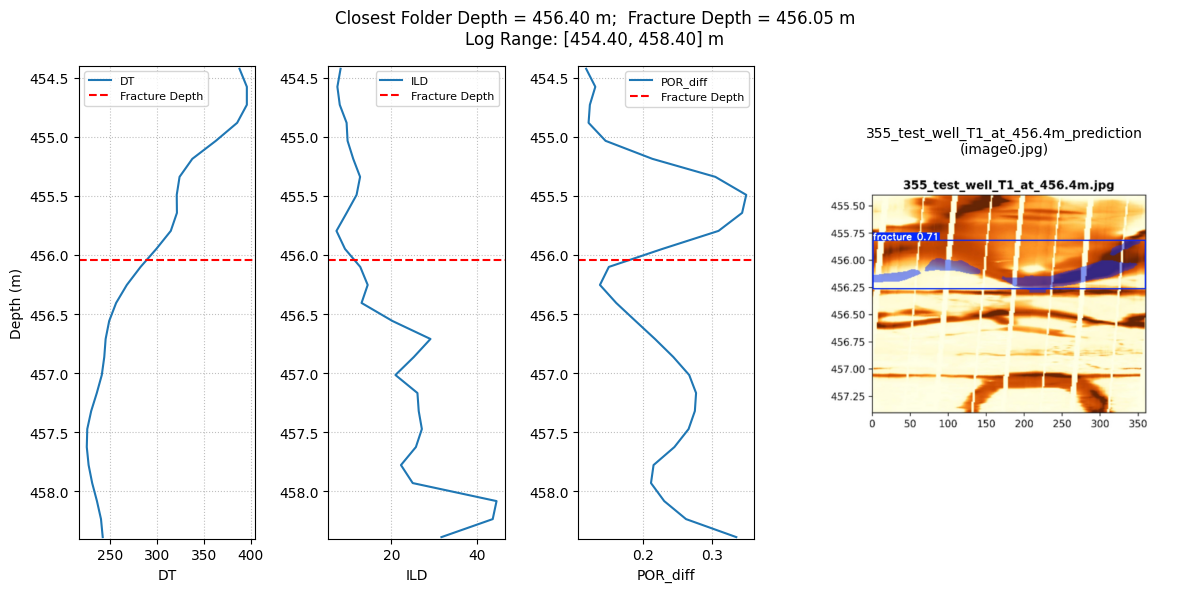

In [43]:
fracture_depth =list_of_frac_depth_T1_sort_filtered[2]  # define depth

base_dir = r"/content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T1"  # update to your actual path
plot_logs_for_fracture(
        df_log=df_T1_merged_frac_short,
        base_dir=base_dir,
        fracture_depth=fracture_depth,
        depth_window=2.0,
        depth_col='Depth',
        log_cols=['DT', 'ILD', 'POR_diff'],  # The log columns you want to see
)

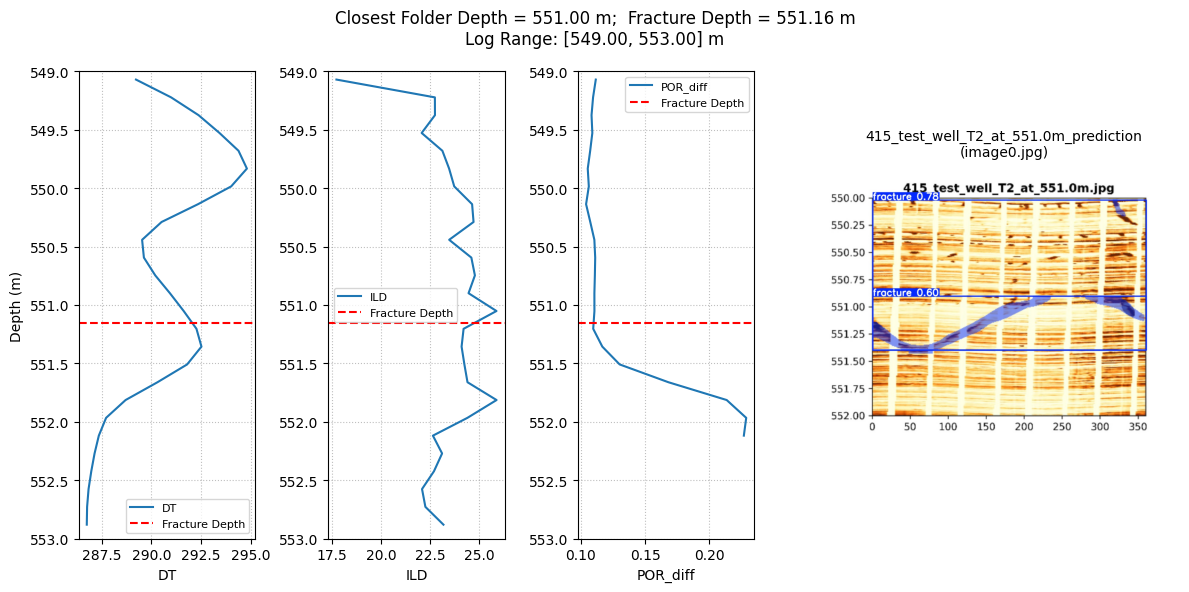

In [44]:
fracture_depth =list_of_frac_depth_T2_sort_filtered[7]  # define depth

base_dir = r"/content/drive/My Drive/fracture_identification/frac_data/test_predictions_new_mask/T2"  # update to your actual path
plot_logs_for_fracture(
        df_log=df_T2_merged_frac_short,
        base_dir=base_dir,
        fracture_depth=fracture_depth,
        depth_window=2.0,
        depth_col='Depth',
        log_cols=['DT', 'ILD', 'POR_diff'],  # The log columns you want to see
)

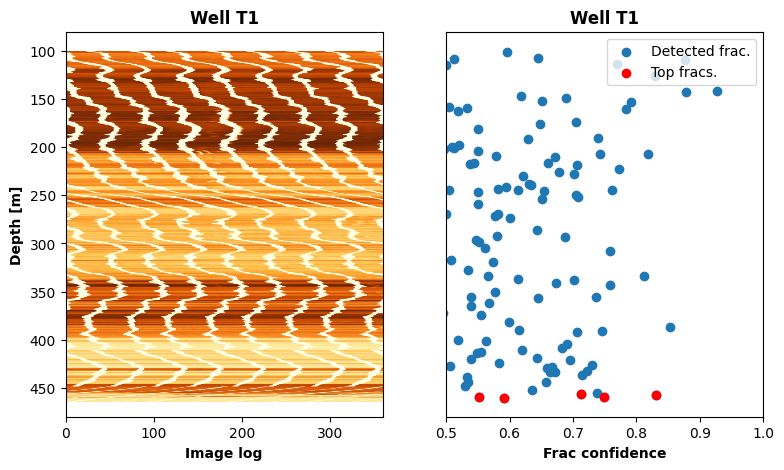

In [45]:
# Test T1 Well Image log and detected fractures with confidence
cm_default = 'YlOrBr_r' # similar color scheme to Techlog image logs
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.imshow(well_images["well_T1"], extent=[0, 360, np.max(well_images["well_T1"].index), np.min(well_images["well_T1"].index)], cmap=cm_default, aspect='auto')
plt.title("Well T1", weight="bold")
plt.xlabel("Image log", weight="bold")
plt.ylabel("Depth [m]", weight="bold")
plt.axis([0, 360, 480, 80])
plt.subplot(122)
plt.scatter(list_of_confidence_T1, list_of_frac_depth_T1, label="Detected frac.")
plt.scatter(list_of_confidence_T1_sort_filtered, list_of_frac_depth_T1_sort_filtered, color='red', label="Top fracs.") # fractures with highest confidence
plt.title("Well T1", weight="bold")
plt.xlabel("Frac confidence", weight="bold")
plt.axis([0.5, 1, 480, 80])
plt.yticks([])
plt.legend(loc='upper right')
plt.show()


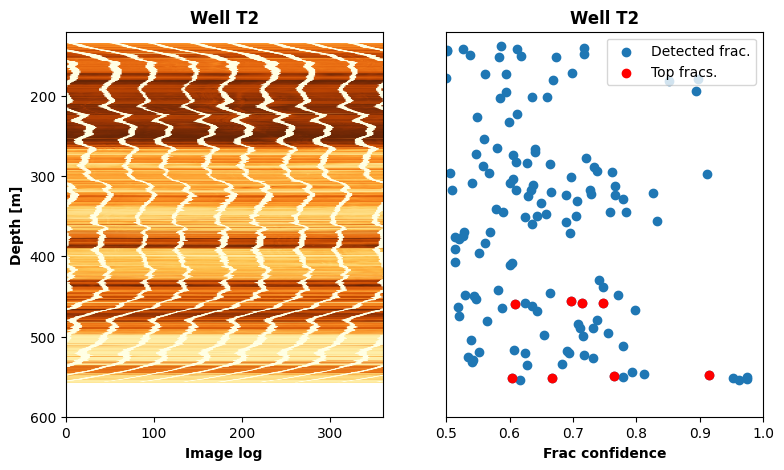

In [46]:
# Test T2 Well Image log and detected fractures with confidence
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.imshow(well_images["well_T2"], extent=[0, 360, np.max(well_images["well_T2"].index), np.min(well_images["well_T2"].index)], cmap=cm_default, aspect='auto')
plt.title("Well T2", weight="bold")
plt.xlabel("Image log", weight="bold")
plt.ylabel("Depth [m]", weight="bold")
plt.axis([0, 360, 600, 120])
plt.subplot(122)
plt.scatter(list_of_confidence_T2, list_of_frac_depth_T2, label="Detected frac.")
plt.scatter(list_of_confidence_T2_sort_filtered, list_of_frac_depth_T2_sort_filtered, color='red', label="Top fracs.") # fractures with highest confidence
plt.title("Well T2", weight="bold")
plt.xlabel("Frac confidence", weight="bold")
plt.axis([0.5, 1, 600, 120])
plt.yticks([])
plt.legend(loc='upper right')
plt.show()


## <a>7. Final Checks</a>
### **Before submitting all fracture depths, we should double check each of them on images and also well logs to make sure they are good candidates for fracture. Also, we may adjust depths little bit (mainly based on logs) to make sure they are on correct depths.**
As an example, for well T2 we had fracture at depths 548m and 548.8m and we decided to consider one fracture with average of both numbers. Also we had 3 fractures at different depths close to the 459m and we dicided to instead of them using 459m as fracture depth.



## <a>8. Export</a>
### **Export fracture depths and save them in a csf file inside a zip file**

In [47]:
# Make a dataframe for the final output
number_of_T1_frac = len(list_of_frac_depth_T1_sort_filtered)
number_of_T2_frac = len(list_of_frac_depth_T2_sort_filtered)
Index = list(range(number_of_T1_frac + number_of_T2_frac))
Well = ['T1'] * number_of_T1_frac + ['T2'] * number_of_T2_frac
Depth = list(list_of_frac_depth_T1_sort[:number_of_T1_frac]) + list(list_of_frac_depth_T2_sort[:number_of_T2_frac])

df_output = {'Index': Index, 'Well': Well, 'Depth': Depth}
df_output = pd.DataFrame(df_output)
df_output
df_final = df_output

In [48]:
# Making prediction "your_team_name.csv" file

# Define file paths
subfolder_name = 'model_mask'
destination_folder = '/content/drive/My Drive/fracture_identification/submissions'
subfolder_path = os.path.join(destination_folder, subfolder_name)
os.makedirs(subfolder_path, exist_ok=True)

zip_filename = 'Vahid_Dehdari.zip'
csv_filename = 'submission.csv'
best_model_path = model_path
model_path_txt = 'model_path.txt'

zip_filepath = os.path.join(subfolder_path, zip_filename)
destination_model_path = os.path.join(subfolder_path, 'best.pt')
model_path_txt_filepath = os.path.join(subfolder_path, model_path_txt)

# 1. Save the DataFrame as a CSV (temporarily in the current working directory)
df_final.to_csv(csv_filename, index=False)

# 2. Create the ZIP file and add the CSV to it with the desired name
with zipfile.ZipFile(zip_filepath, mode='w', compression=zipfile.ZIP_DEFLATED) as zf:
    zf.write(csv_filename, arcname='submission.csv')

shutil.copy(best_model_path, destination_model_path)

with open(model_path_txt_filepath, 'w') as f:
    f.write(best_model_path + '\n')
    f.write('Confidence score: '+str(conf_threshold) + '\n')

print(f"ZIP file, model, and path text file have been saved to: {subfolder_path}")


ZIP file, model, and path text file have been saved to: /content/drive/My Drive/fracture_identification/submissions/model_mask


## <a>9. Acknowledgement</a>
We would like to thank ConocoPhillips Canada for the permission to utilize the image log dataset in developing the ML models of this study. Both SPWLA and ConocoPhillips do not accept any liabilities or make any warranty about the provided data.

